# **Machine Learning para Predições em Saúde**
Curso de Verão - 2025

Faculdade de Saúde Pública

## **Etapas de Análise**
**1. Instalação de pacotes adicionais**

**2. Importação de bibliotecas e pacotes**

**3. Obtendo o conjunto de dados**

**4. Preparação do conjunto de dados (pré-processamento)**

**5. Função auxiliar RunModel**

**6. Execução dos algoritmos de machine learning**

**7. Não quero fazer nessa estrutrutura automatizada, como proceder?**

**8. Seleção de variáveis com BORUTA**

**9. Catboost com BORUTA**

**10. Valores de Shapley**

**11. Salvando e carregando o modelo**



---




**1. Instalação de pacotes adicionais**

In [4]:
!pip install catboost

  Using cached catboost-1.2.7.tar.gz (71.5 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [133 lines of output]
        Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
        Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
        Using cached conan-1.66.0.tar.gz (789 kB)
        Preparing metadata (setup.py): started
        Preparing metadata (setup.py): finished with status 'done'
        Using cached ipython-8.32.0-py3-none-any.whl.metadata (5.0 kB)
        Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
        Using cached tornado-6.4.2-cp38-abi3-win_amd64.whl.metadata (2.6 kB)
        Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
        Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
        Using cached jupyter_server-2.15.0-py3-none-any.whl.metadata (8.4 kB)
       

In [2]:
# ver descrição dos pacotes na seção de importação
!pip install dfply
!pip install scikit-plot
!pip install graphviz
!pip install dtreeviz
!pip install catboost
!pip install boruta

   ---------------------------------------- 0.0/612.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/612.4 kB ? eta -:--:--
   ---------------------------------- ----- 524.3/612.4 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 612.4/612.4 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached catboost-1.2.7.tar.gz (71.5 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [137 lines of output]
        Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
        Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
           ---------------------------------------- 0.0/790.0 kB ? eta -:--:--
           ---------------------------------------- 0.0/790.0 kB ? eta -:--:--
           ------------- -------------------------- 262.1/790.0 kB ? eta -:--:--
           -------------------------------------- 790.0/790.0 kB 1.6 MB/s eta 0:00:00
        Preparing metadata (setup.py): started
        Preparing metadata (setup.py): finished with status 'done'
        Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
        Using cached jupyter_core-5.7.2-py3-none-any.whl.metadata (3.4 kB)
        Using cached jupyterlab_server-


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**2. Importação de bibliotecas e pacotes**

In [3]:
import pandas as pd  # processamento de bancos de dados
import numpy as np  # processamento numérico
import matplotlib.pyplot as plt  # geração de gráficos
import seaborn as sns  # geração de gráficos alternativos

# Configuração de gráficos no notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'

# Configurações de fonte e matemática
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['DejaVu Sans'], 'size': 10})
rc('mathtext', **{'default': 'regular'})

# SCIKIT-LEARN
from sklearn.metrics import (roc_curve, auc, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             accuracy_score, brier_score_loss)
from sklearn.model_selection import (KFold, cross_val_score, train_test_split,
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import preprocessing

# Biblioteca dfply
from dfply import *

# Visualização de árvores de decisão
from dtreeviz.trees import *

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Definição de semente de aleatoriedade
np.random.seed(42)


ModuleNotFoundError: No module named 'catboost'

**3. Obtendo o conjunto de dados**

In [ ]:
# importaremos nosso conjunto de dados em formato .csv, a partir de uma disponibilização online no github.
# por padrão, no comando read_csv, as colunas são separadas por "," e os decimais por "."
# !!! cuidado com os arquivos csv nacionais/latinos, em que a separação das colunas é feita por ";" e os decimais por  ","

dataset = pd.read_csv('https://raw.githubusercontent.com/laderast/cvdRiskData/master/data-raw/fullPatientData.csv')

NameError: name 'pd' is not defined

3.1 Verificando o conjunto de dados

In [ ]:
dataset.shape # utilizamos o comando .shape para a verificação do número de linhas e número de colunas (linhas, colunas). Aqui já sabemos se há algum problema de importação nos dados

(425195, 13)

In [ ]:
# o comando .head é importante para verificarmos as linhas inicias de um conjunto de dados
# por padrão, ele apresenta as 5 linhas inicias. Porém, podemos alterar este valor indicando o n° de linhas dentro dos parênteses, como dataset.head(10)
# uma alternativa ao .head é o .tail, que apresenta os últimos valores da tabela de dados
dataset.head(5)

,patientID,age,htn,treat,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd
0,HHUID00076230,20-40,Y,Y,N,Asian/PI,N,M,21,26,176,179,N
1,HHUID00547835,70-90,N,N,N,White,N,M,86,23,244,123,N
2,HHUID00450841,20-40,Y,Y,N,White,N,M,29,22,189,165,N
3,HHUID00380788,20-40,Y,Y,N,White,N,M,24,24,218,172,N
4,HHUID00043423,20-40,N,N,N,Asian/PI,N,M,40,20,207,111,N


In [ ]:
dataset.info() # utilizamos o info para verificar as caracterísitcas iniciais as variáveis, como nome das colunas, presença de valores não preenchidos e codificação

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425195 entries, 0 to 425194
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   patientID  425195 non-null  object
 1   age        425195 non-null  object
 2   htn        425195 non-null  object
 3   treat      425195 non-null  object
 4   smoking    425195 non-null  object
 5   race       425195 non-null  object
 6   t2d        425195 non-null  object
 7   gender     425195 non-null  object
 8   numAge     425195 non-null  int64 
 9   bmi        425195 non-null  int64 
 10  tchol      425195 non-null  int64 
 11  sbp        425195 non-null  int64 
 12  cvd        425195 non-null  object
dtypes: int64(4), object(9)
memory usage: 42.2+ MB


Neste caso, nosso conjunto de dados não possui valores sem preenchimento. No entanto, é importante verificar se não há missing codificado, como "999", "000", "não disponível", "não preenchido", etc.


**4. Preparação do conjunto de dados (pré-processamento)**






4.1 Filtrando o conjunto de dados

Para os modelos preditivos a serem desenvolvidos, iremos considerar individuos com idade superior a 55 anos.
Removeremos também as variáveis "patientID", "age" e "treat"

In [ ]:
# é recomendável a criação de novas tabelas de dados conforme as etapas de pré-processamento, para evitarmos ter de rodar o código desde o início, caso haja algum erro
# o conjunto de dados inicial foi chamado de "dataset". O conjunto de dados filtrado foi chamado de "cvd_data"
cvd_data = (dataset >>
               mask(X.numAge > 55) >>
               drop(X.patientID, X.age, X.treat)
              )

In [ ]:
cvd_data.head(5)

,htn,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd
1,N,N,White,N,M,86,23,244,123,N
7,N,N,White,N,M,59,23,178,113,N
10,N,N,Asian/PI,N,M,69,19,181,118,N
11,Y,Y,White,N,M,56,21,188,183,N
12,N,N,White,N,M,64,16,240,111,N


In [ ]:
cvd_data.shape

(125335, 10)

4.2 Para as variáveis categóricas iremos criar dummies

In [ ]:
# aqui inserimos o comando get_dummies para a realização do one hot encoding para as variáveis categórias
# as variáveis dicotômicas não precisam passar pelo one hot encoding. Podemos somente aplicar o label encoding, substintuindo os valores por 0 e 1

cvd_data =  pd.get_dummies(cvd_data, columns=['race'], dtype=int)

In [ ]:
cvd_data.head(10).T # podemos utilizar o comando .T para transpor a visualização

,1,7,10,11,12,32,33,35,36,37
htn,N,N,N,Y,N,N,Y,N,Y,N
smoking,N,N,N,Y,N,N,N,N,N,N
t2d,N,N,N,N,N,N,N,N,N,N
gender,M,M,M,M,M,M,M,M,M,M
numAge,86,59,69,56,64,66,82,56,58,80
bmi,23,23,19,21,16,22,20,16,16,23
tchol,244,178,181,188,240,241,206,245,244,207
sbp,123,113,118,183,111,140,204,123,179,124
cvd,N,N,N,N,N,Y,Y,N,N,N
race_AmInd,0,0,0,0,0,0,0,0,0,0


In [ ]:
cvd_data[['htn', 'smoking', 't2d', 'gender']] = cvd_data[['htn', 'smoking', 't2d', 'gender']].apply(preprocessing.LabelEncoder().fit_transform)
# o label enconder utiliza por padrão a ordem alfabética. Dessa forma, como nossos dados estavam com categorias "N" e "Y", "N" assume o valor 0 e "Y" o valor 1
# para o sexo: F -> 0,  M -> 1
# caso este não seja o cenário desejado, é possível invertar a ordem pelo inverse_transform

In [ ]:
cvd_data.head(10).T

,1,7,10,11,12,32,33,35,36,37
htn,0,0,0,1,0,0,1,0,1,0
smoking,0,0,0,1,0,0,0,0,0,0
t2d,0,0,0,0,0,0,0,0,0,0
gender,1,1,1,1,1,1,1,1,1,1
numAge,86,59,69,56,64,66,82,56,58,80
bmi,23,23,19,21,16,22,20,16,16,23
tchol,244,178,181,188,240,241,206,245,244,207
sbp,123,113,118,183,111,140,204,123,179,124
cvd,N,N,N,N,N,Y,Y,N,N,N
race_AmInd,0,0,0,0,0,0,0,0,0,0


4.3 Obtendo os conjuntos de treino e teste

In [ ]:
variaveis_preditoras = cvd_data.iloc[:, cvd_data.columns != 'cvd'] # separamos as nossas variáveis preditoras do nosso desfecho/target ==> conjunto X
classe = cvd_data.iloc[:, cvd_data.columns == 'cvd'] # criamos um vetor (única coluna) selecionando somente a variável desfecho ==> conjunto y

# separamos os nossos dados através do comando train_test_split, indicando o conjunto de dados preditivos X = variaveis_preditoras, y = classe,
# train_size e selecionamos a semente de aleatoriedade
X_train, X_test, y_train, y_test = train_test_split(variaveis_preditoras,
                                                    classe,
                                                    stratify = classe,
                                                    train_size = 0.70,
                                                    random_state = 42)

In [ ]:
X_train.columns

Index(['htn', 'smoking', 't2d', 'gender', 'numAge', 'bmi', 'tchol', 'sbp',
       'race_AmInd', 'race_Asian/PI', 'race_Black/AfAm', 'race_White'],
      dtype='object')

In [ ]:
# Standarscaler com passthrough tem um problema de ordenação das colunas para algumas versões do SKLearn. Quando aplicado, o método fornece o
# resultado com as colunas padronizadas em primeiro, seguidas das demais colunas.
# Para resolver este problema, iremos ordenar as nossas colunas alocando as contínuas nas primeiras posições

X_train = X_train.loc[:,['numAge', 'bmi', 'tchol', 'sbp', # variaveis continuas
                          'htn', 'smoking', 't2d', 'gender','race_AmInd', 'race_Asian/PI', 'race_Black/AfAm', 'race_White']]
X_test = X_test.loc[:,['numAge', 'bmi', 'tchol', 'sbp', # variaveis continuas
                          'htn', 'smoking', 't2d', 'gender','race_AmInd', 'race_Asian/PI', 'race_Black/AfAm', 'race_White']]

X_train_columns = X_train.columns
X_test_columns = X_test.columns

4.4 As variáveis contínuas serão padronizadas

In [ ]:
from sklearn.compose import ColumnTransformer

### variáveis contínuas que serão padronizadas
continuous_cols = ['numAge', 'bmi', 'tchol', 'sbp']

def setScaler():
  ct = ColumnTransformer([
        ('scaler', StandardScaler(), continuous_cols)
    ], remainder='passthrough' # utilizamos para manter as colunas em que não aplicamos o scaler
  )
  return ct

scaler = setScaler()


In [ ]:
scaler.fit(X_train) # realizamos o fit no treino e aplicamos os valores obtidos (média e desvio padrão) para a padronização do treino e do teste

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(),
                                 ['numAge', 'bmi', 'tchol', 'sbp'])])

In [ ]:
X_train = scaler.transform(X_train) # transformando (padronizando) os dados de treino

In [ ]:
X_test = scaler.transform(X_test) # transformando (padronizando) os dados de teste, com as informações do treino

In [ ]:
# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# a padronização retorna os dados em formato array. Precisamos transformá-los novamente para data.frame
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

In [ ]:
X_train.head()

,numAge,bmi,tchol,sbp,htn,smoking,t2d,gender,race_AmInd,race_Asian/PI,race_Black/AfAm,race_White
0,1.701,0.477,-0.450,-0.512,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
1,-1.302,-0.434,-0.889,-0.575,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
2,-0.658,0.704,-1.125,-0.607,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
3,2.345,-0.434,0.225,-0.512,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
4,-0.873,0.249,1.272,-0.702,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000


In [ ]:
X_test.describe()

,numAge,bmi,tchol,sbp,htn,smoking,t2d,gender,race_AmInd,race_Asian/PI,race_Black/AfAm,race_White
count,37601.000,37601.000,37601.000,37601.000,37601.000,37601.000,37601.000,37601.000,37601.000,37601.000,37601.000,37601.000
mean,0.000,0.006,0.006,0.001,0.486,0.128,0.069,0.408,0.005,0.175,0.059,0.761
std,0.998,1.005,0.999,1.000,0.500,0.334,0.254,0.492,0.069,0.380,0.236,0.426
min,-1.302,-1.572,-1.125,-2.093,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.766,-0.661,-0.956,-0.923,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,-0.229,-0.206,-0.247,-0.322,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,0.629,0.477,0.698,0.973,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
max,2.345,3.208,1.914,2.175,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
# transformando a variável target: Y --> 1 e N --> 0
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [ ]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

**6. Execução dos algoritmos de machine learning**

In [ ]:
# Inicializando uma lista para armazenar resultados
results = []
roc_data = {}
calibration_data = {}

# Definindo a lista de modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(silent=True, random_state=42),
}

# Função para calcular métricas e armazenar os resultados para cada modelo
for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])

    # Treinando o modelo
    pipeline.fit(X_train, y_train)

    # Prevendo nos dados de teste
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculando métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_score = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score
    })

    # Salvando dados para gráficos de ROC e calibração
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
        roc_data[name] = (fpr, tpr, auc(fpr, tpr))
        calibration_data[name] = (prob_true, prob_pred)


[LightGBM] [Info] Number of positive: 24659, number of negative: 63075
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 87734, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281065 -> initscore=-0.939183
[LightGBM] [Info] Start training from score -0.939183


,Model,Accuracy,Precision,Recall,F1 Score,AUC
2,LightGBM,0.764,0.747,0.764,0.741,0.776
3,CatBoost,0.764,0.746,0.764,0.740,0.774
1,XGBoost,0.760,0.741,0.760,0.738,0.770
0,Random Forest,0.739,0.719,0.739,0.722,0.735


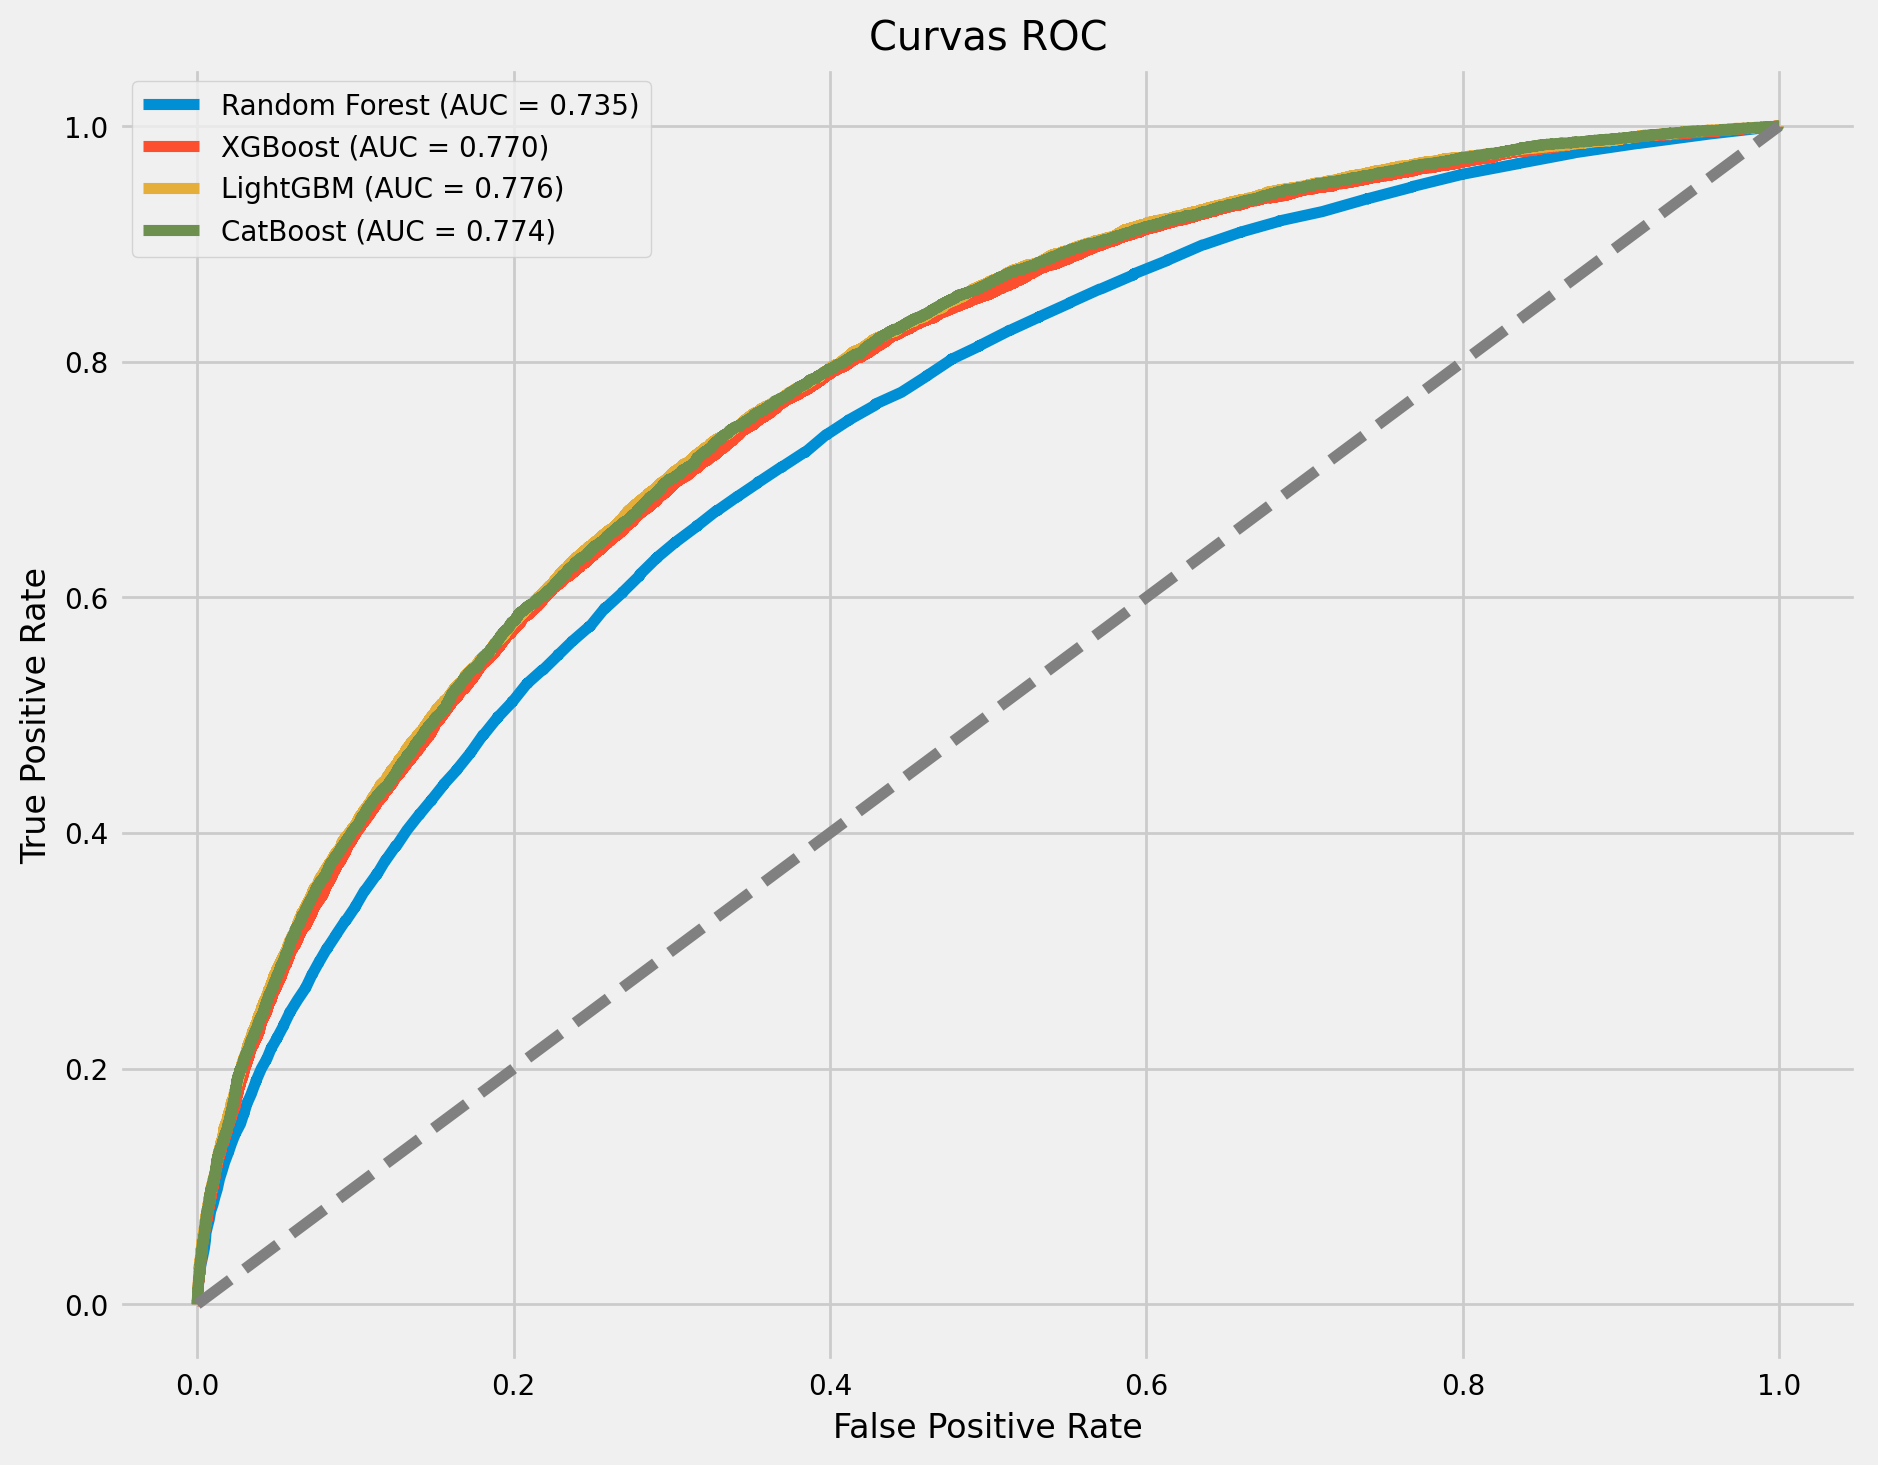

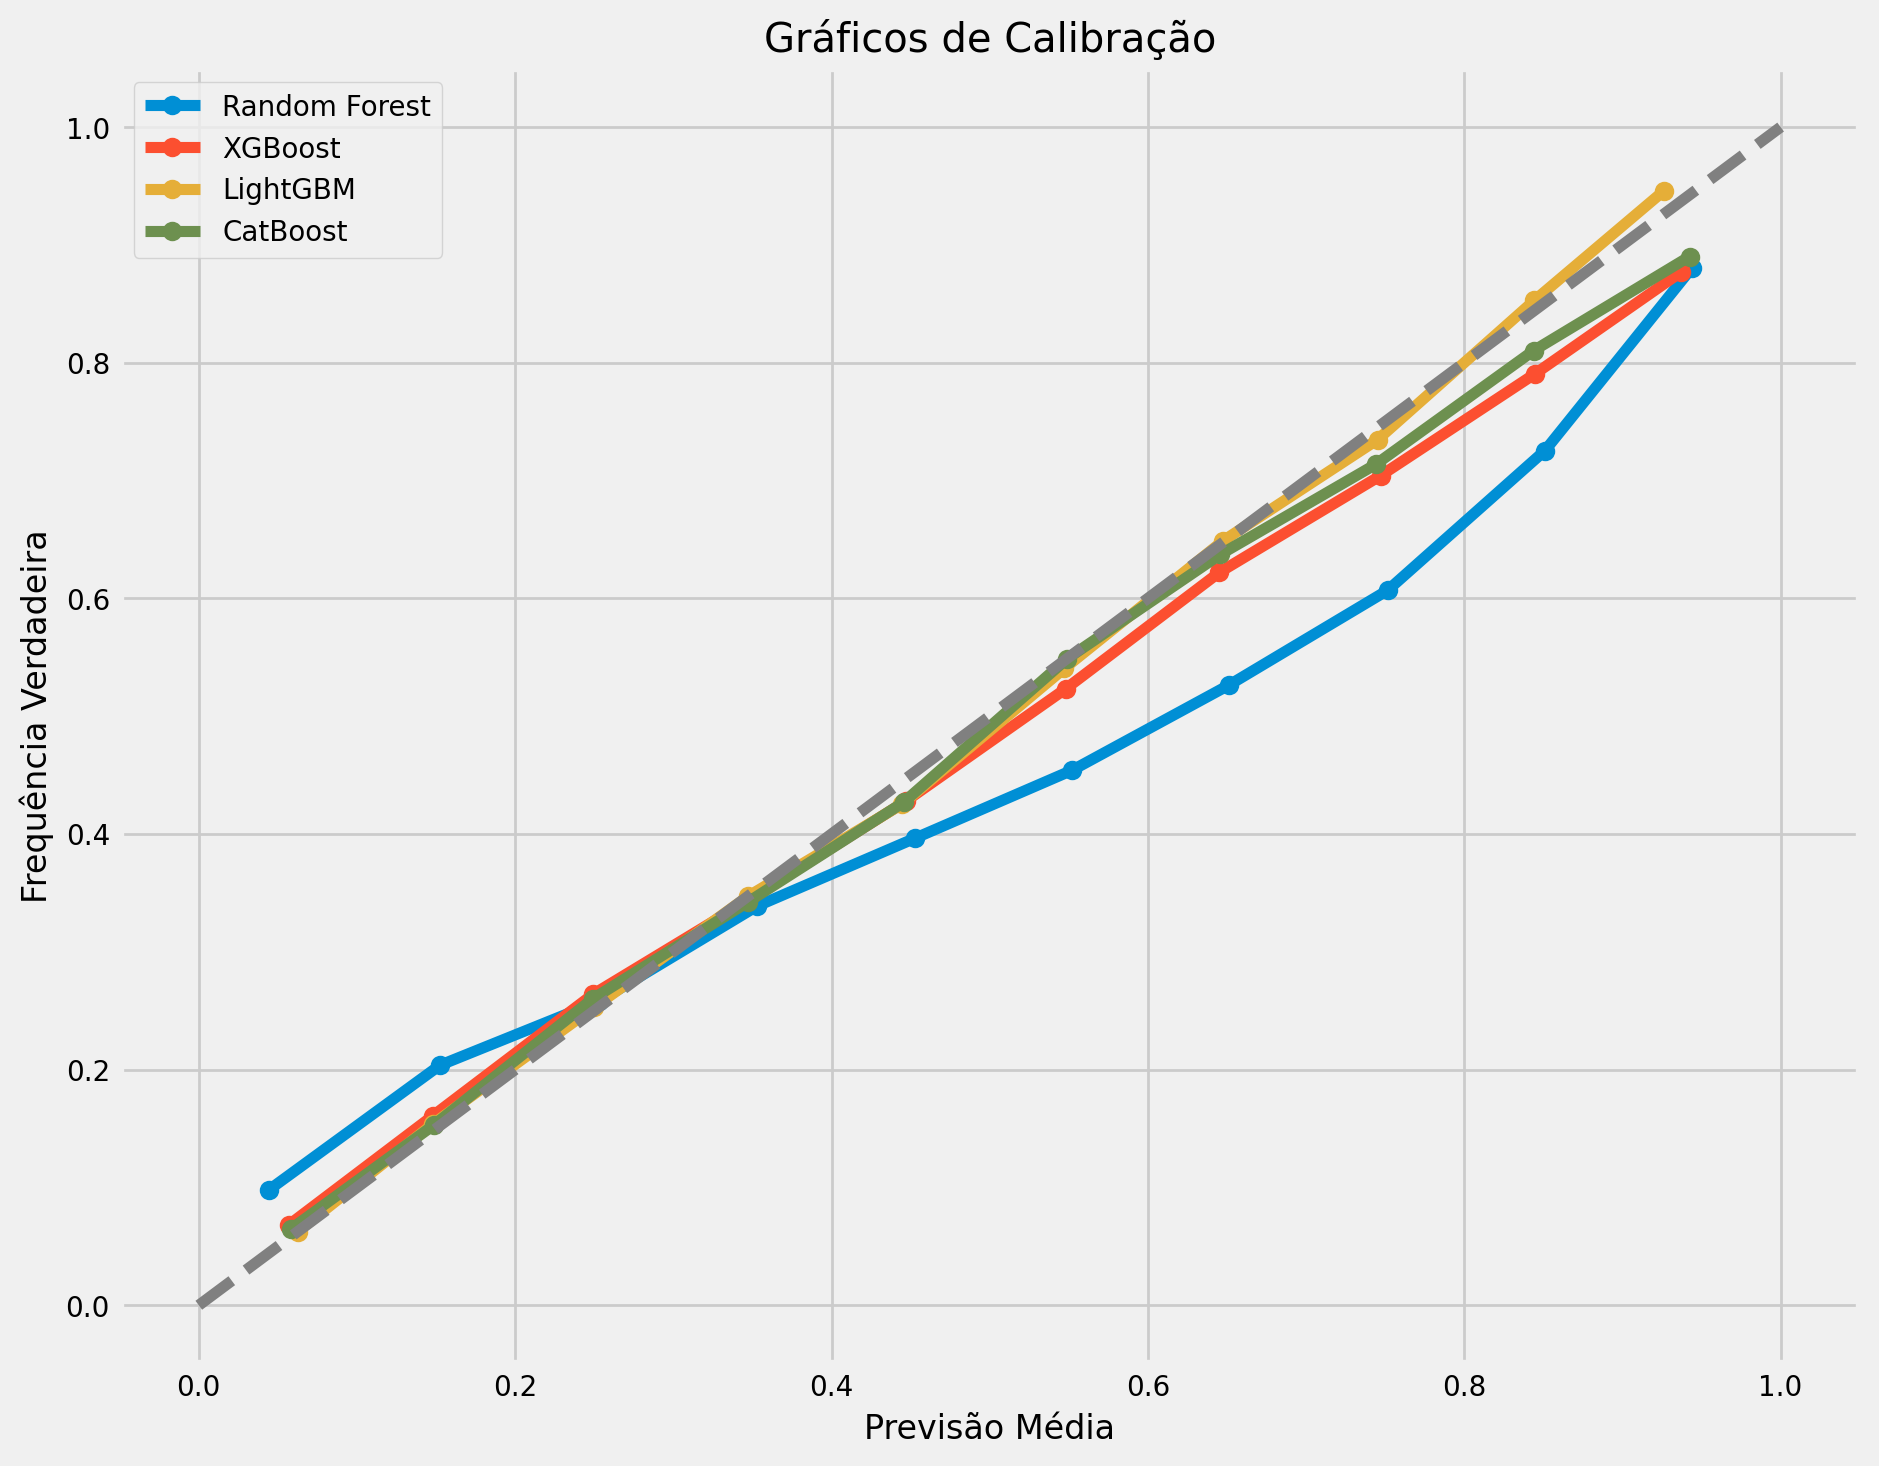

In [ ]:
# Exibindo a tabela de resultados
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results_df = pd.DataFrame(results)
display(results_df.sort_values(by="F1 Score", ascending=False))

# Plotando as curvas ROC
plt.figure(figsize=(10, 8))
for model, (fpr, tpr, auc_score) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend()
plt.show()

# Plotando as curvas de calibração
plt.figure(figsize=(10, 8))
for model, (prob_true, prob_pred) in calibration_data.items():
    plt.plot(prob_pred, prob_true, marker='o', label=model)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Previsão Média')
plt.ylabel('Frequência Verdadeira')
plt.title('Gráficos de Calibração')
plt.legend()
plt.show()


**6.1 Random Forest**

In [ ]:
# modelo random forest
rf = RandomForestClassifier(random_state=42, verbose=1)

#### Otimização de hiperparâmetros

In [ ]:
np.random.seed(42)

# Número de árvores no Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Número de features a serem consideradas a cada split
max_features = ['log2', 'sqrt']
# Número máximo de níveis na árvore
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada leaf node
min_samples_leaf = [2, 4]
# Método de seleção das amostras para treinamento de cada árvore
bootstrap = [True, False]
# Criação do param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth#,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }

# Caso deseje rodar GridSearchCV, troque a linha abaixo pela que segue
#cv_rf = GridSearchCV(fit_rf, cv=3, param_grid=param_grid,n_jobs = -1)

cv_rf = RandomizedSearchCV(rf, n_iter=10, cv=3, verbose=1, param_distributions=param_grid,n_jobs = -1)

In [ ]:
# otimizando os hiperparâmetros
cv_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   21.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   37.9s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(random_state=42, verbose=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 12, 16, 20],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   verbose=1)

In [ ]:
# Extrai os melhores hiperparâmetros do Random Search
best_params_rf = cv_rf.best_estimator_.get_params()
best_params_rf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 1,
 'warm_start': False}

In [ ]:
# modelo random forest otimizado
rf = RandomForestClassifier(**best_params_rf)

In [ ]:
# Supondo que você já tenha X_test, y_test e model treinado
model = rf.fit(X_train, y_train)

# Fazendo previsões
prob_pos_rf = model.predict_proba(X_test)[:, 1]
y_pred_rf = model.predict(X_test)

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_rf)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_rf)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_rf)))
print(classification_report(y_test, y_pred_rf))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   20.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   37.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    2.2s


Random Forest Model
Accuracy: 0.7636
Precision: 0.6634
Recall: 0.3226
AUC: 0.7728
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     27033
           1       0.66      0.32      0.43     10568

    accuracy                           0.76     37601
   macro avg       0.72      0.63      0.64     37601
weighted avg       0.75      0.76      0.73     37601



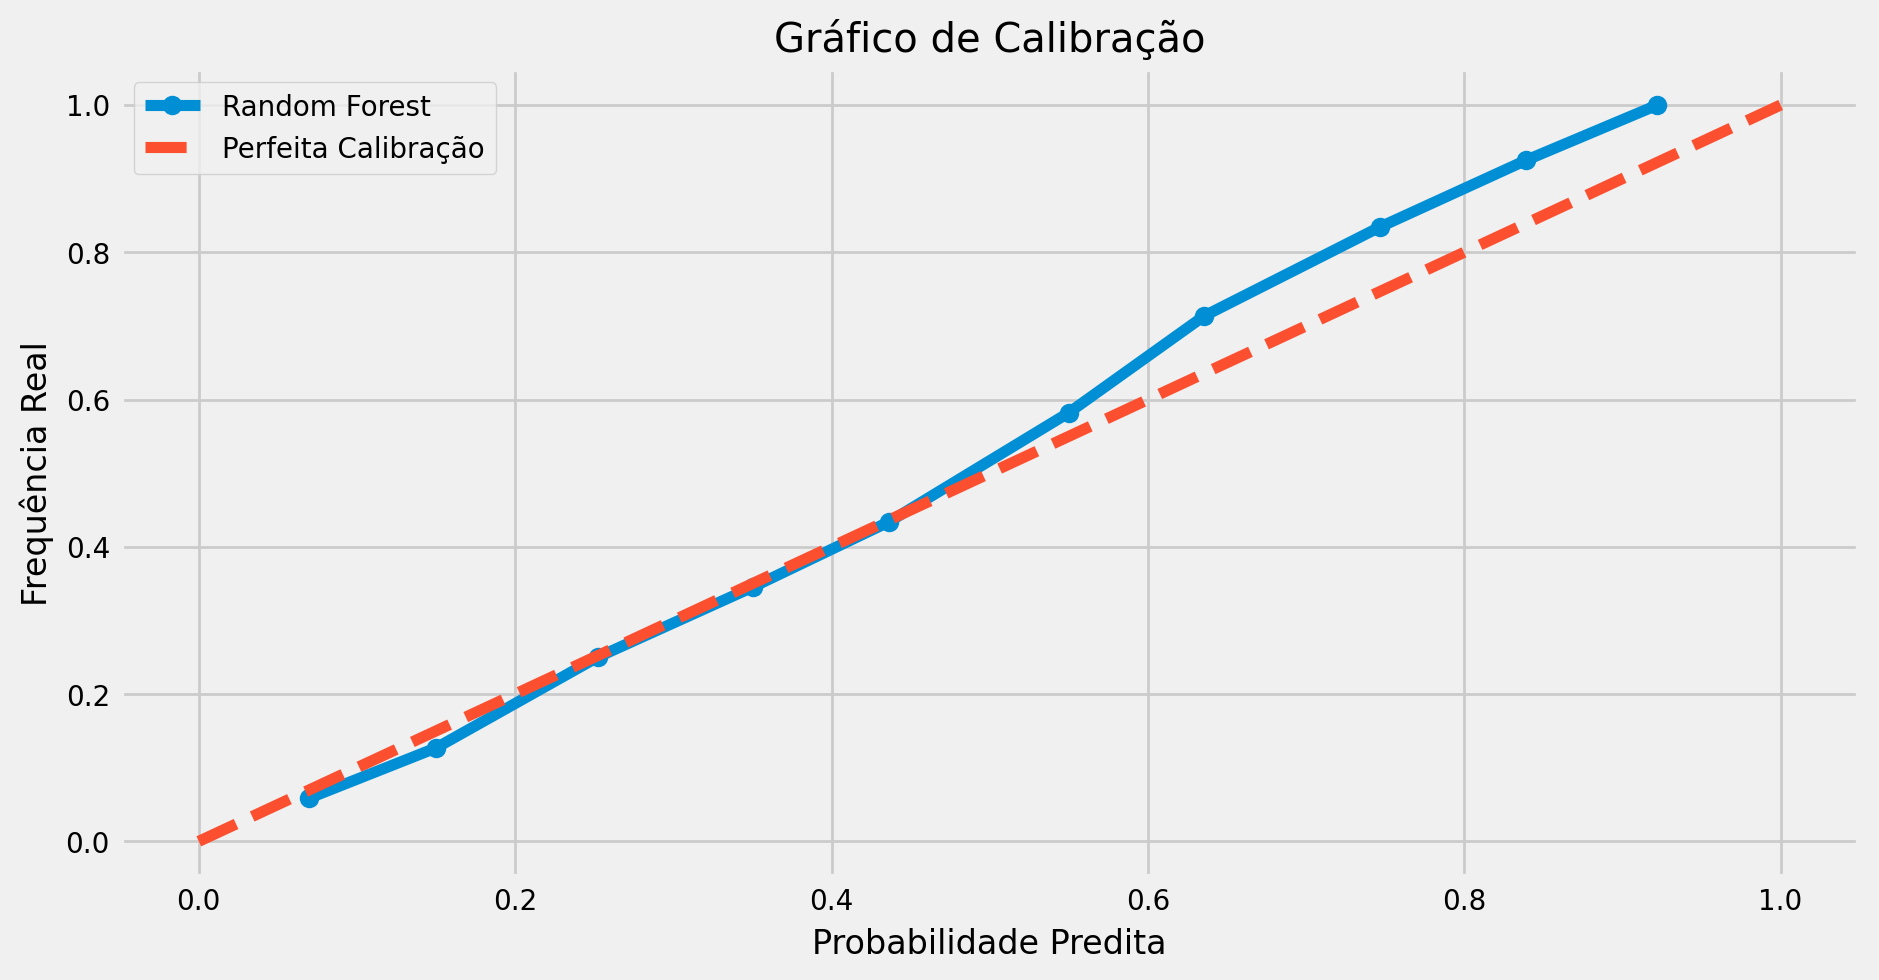

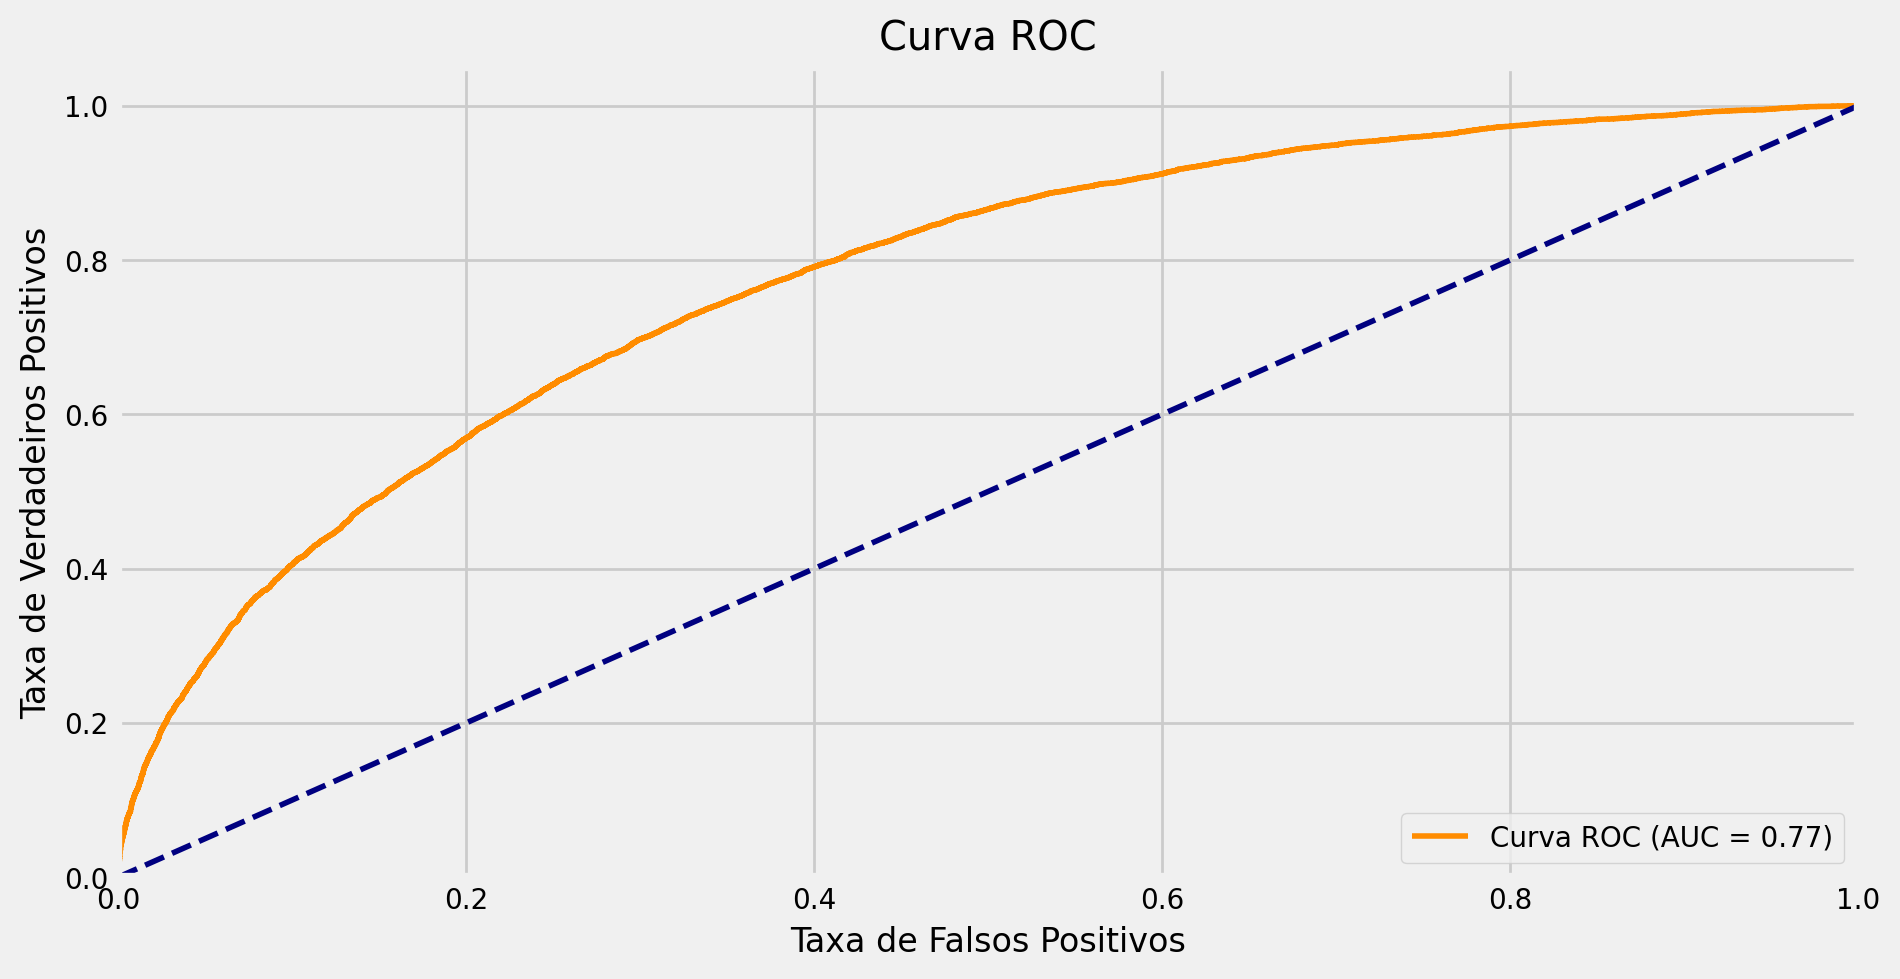

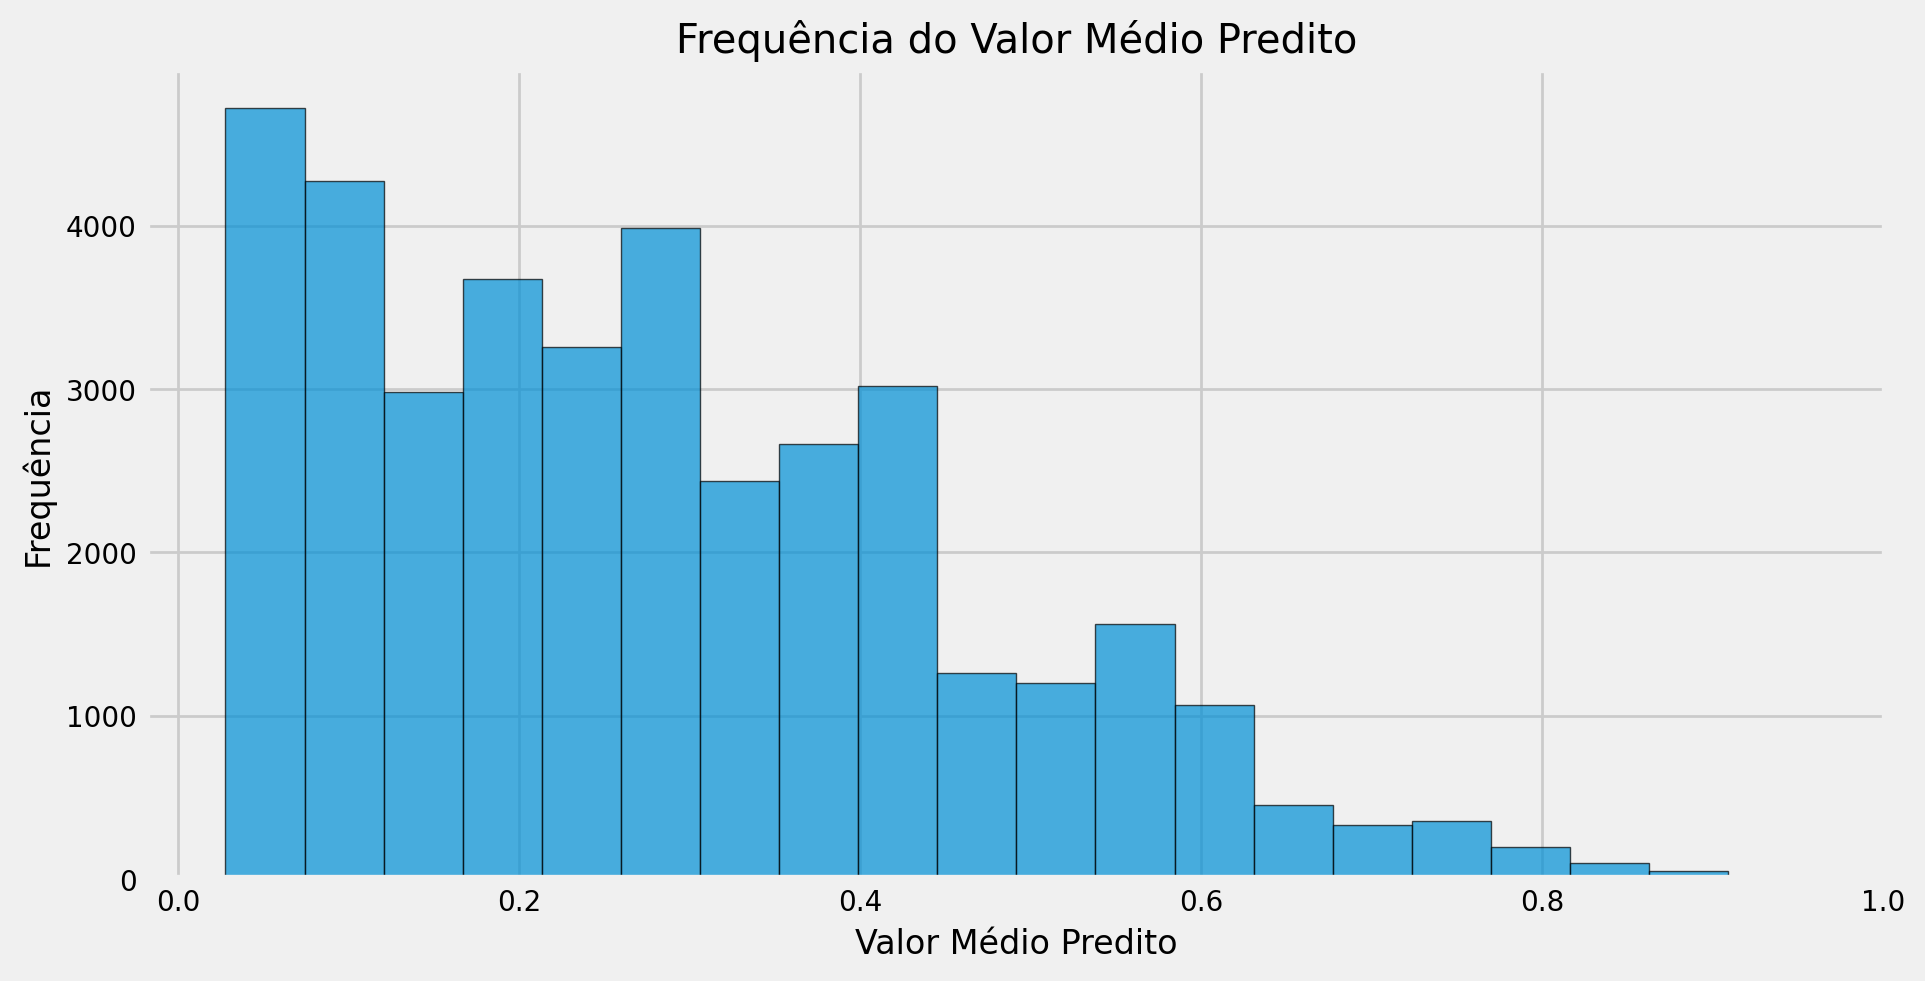

In [ ]:
# Gráfico de Calibração
plt.figure(figsize=(10, 5))

prob_true, prob_pred = calibration_curve(y_test, prob_pos_rf, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeita Calibração')

plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência Real')
plt.title('Gráfico de Calibração')
plt.legend()
plt.show()

# Área sob a curva ROC
fpr, tpr, _ = roc_curve(y_test, prob_pos_rf)
roc_auc = roc_auc_score(y_test, prob_pos_rf)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Frequência do Valor Médio Predito
plt.figure(figsize=(10, 5))
plt.hist(prob_pos_rf, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Valor Médio Predito')
plt.ylabel('Frequência')
plt.title('Frequência do Valor Médio Predito')
plt.show()


**6.2 XGBOOST**

In [ ]:
# otimização de hiperparâmetros
# definindo o grid para possíveis valores dos hiperparâmetros

grid_xgboost = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [3, 6, 9, 12],
    'eta': [0.01, 0.03, 0.05, 0.1]
} # definimos o range dos hiperparâmetros a serem testados. É possível inserir outros hiperparâmetros para serem otimizados.
# é recomendável comparar os resultados dos hiperparâmetros otimizados com o algoritmo no default.

xgboost_model = XGBClassifier(random_state=42) # realizamos a "chamada" do algoritmo, sem aplicar diretamente aos nossos dados
rs_cv_xgboost = RandomizedSearchCV(xgboost_model,  # realizamos a chamada do randomsearchCV, indicando que utilizaremos o algoritmo definido como 'catboost_rs'
            grid_xgboost,
            cv=3,
            n_iter=5,
            scoring = 'roc_auc',
            n_jobs = -1,
            verbose = 5,
            return_train_score = False,
            random_state=42)


In [ ]:
# aplicamos o random search com base nas definições do bloco de código anterior. No fit, especificamos que estamos aplicando ao conjunto de treinamento.
rs_cv_xgboost.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'eta': [0.01, 0.03, 0.05, 0.1],
                                        'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [100, 500, 1000, 2000]},
                   random_state=42, scoring='roc_auc', verbose=5)

In [ ]:
best_params_xgb = rs_cv_xgboost.best_params_ # obtemos os hiperparâmetros otimizados
best_params_xgb

{'n_estimators': 500, 'max_depth': 6, 'eta': 0.01}

In [ ]:
# xgboost
clf_xgboost = XGBClassifier(**best_params_xgb, random_state=42) # "chamamos o algoritmo com os hiperparâmetros obtidos"
clf_xgboost.fit(X_train, y_train) # fazemos o fit no treino

y_pred_xgboost = clf_xgboost.predict(X_test) # obtemo as predições no teste
prob_pos_xgboost = clf_xgboost.predict_proba(X_test)[:,1] # obtemos as probabilidades preditas no teste

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost)))
print(classification_report(y_test, y_pred_xgboost))

XGBoost Model
Accuracy: 0.7653
Precision: 0.6537
Recall: 0.3505
AUC: 0.7760
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     27033
           1       0.65      0.35      0.46     10568

    accuracy                           0.77     37601
   macro avg       0.72      0.64      0.65     37601
weighted avg       0.75      0.77      0.74     37601



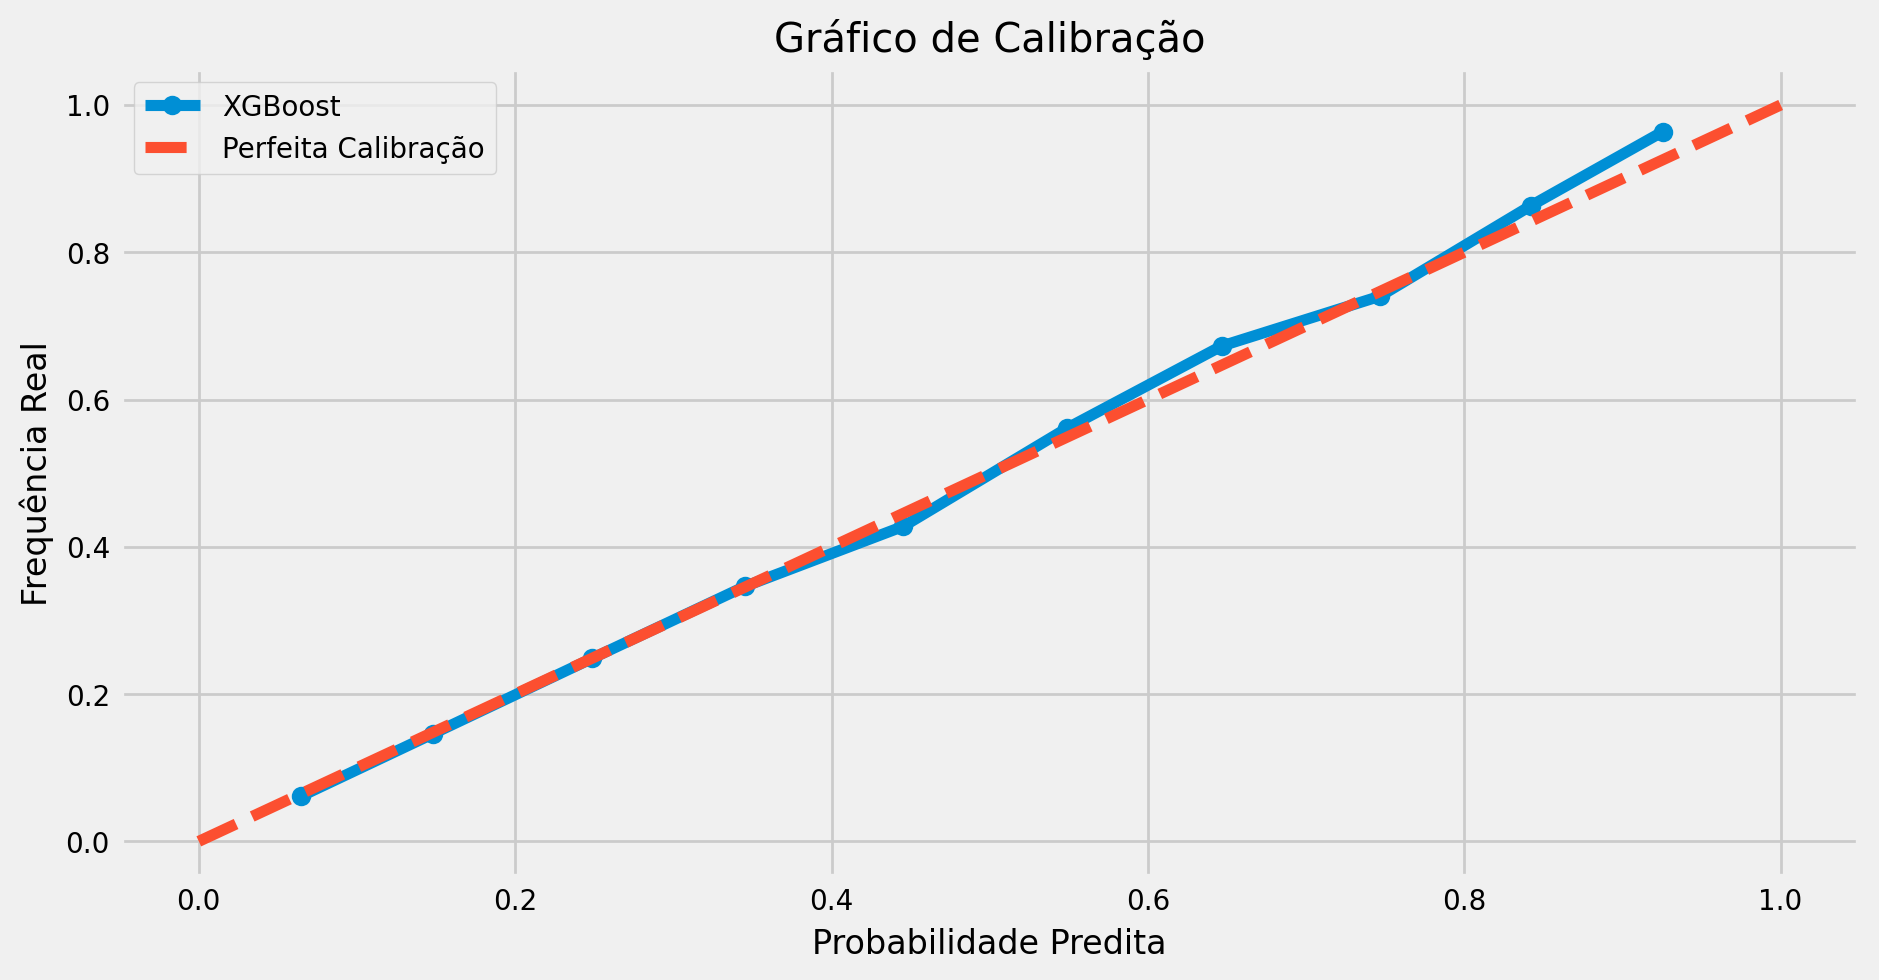

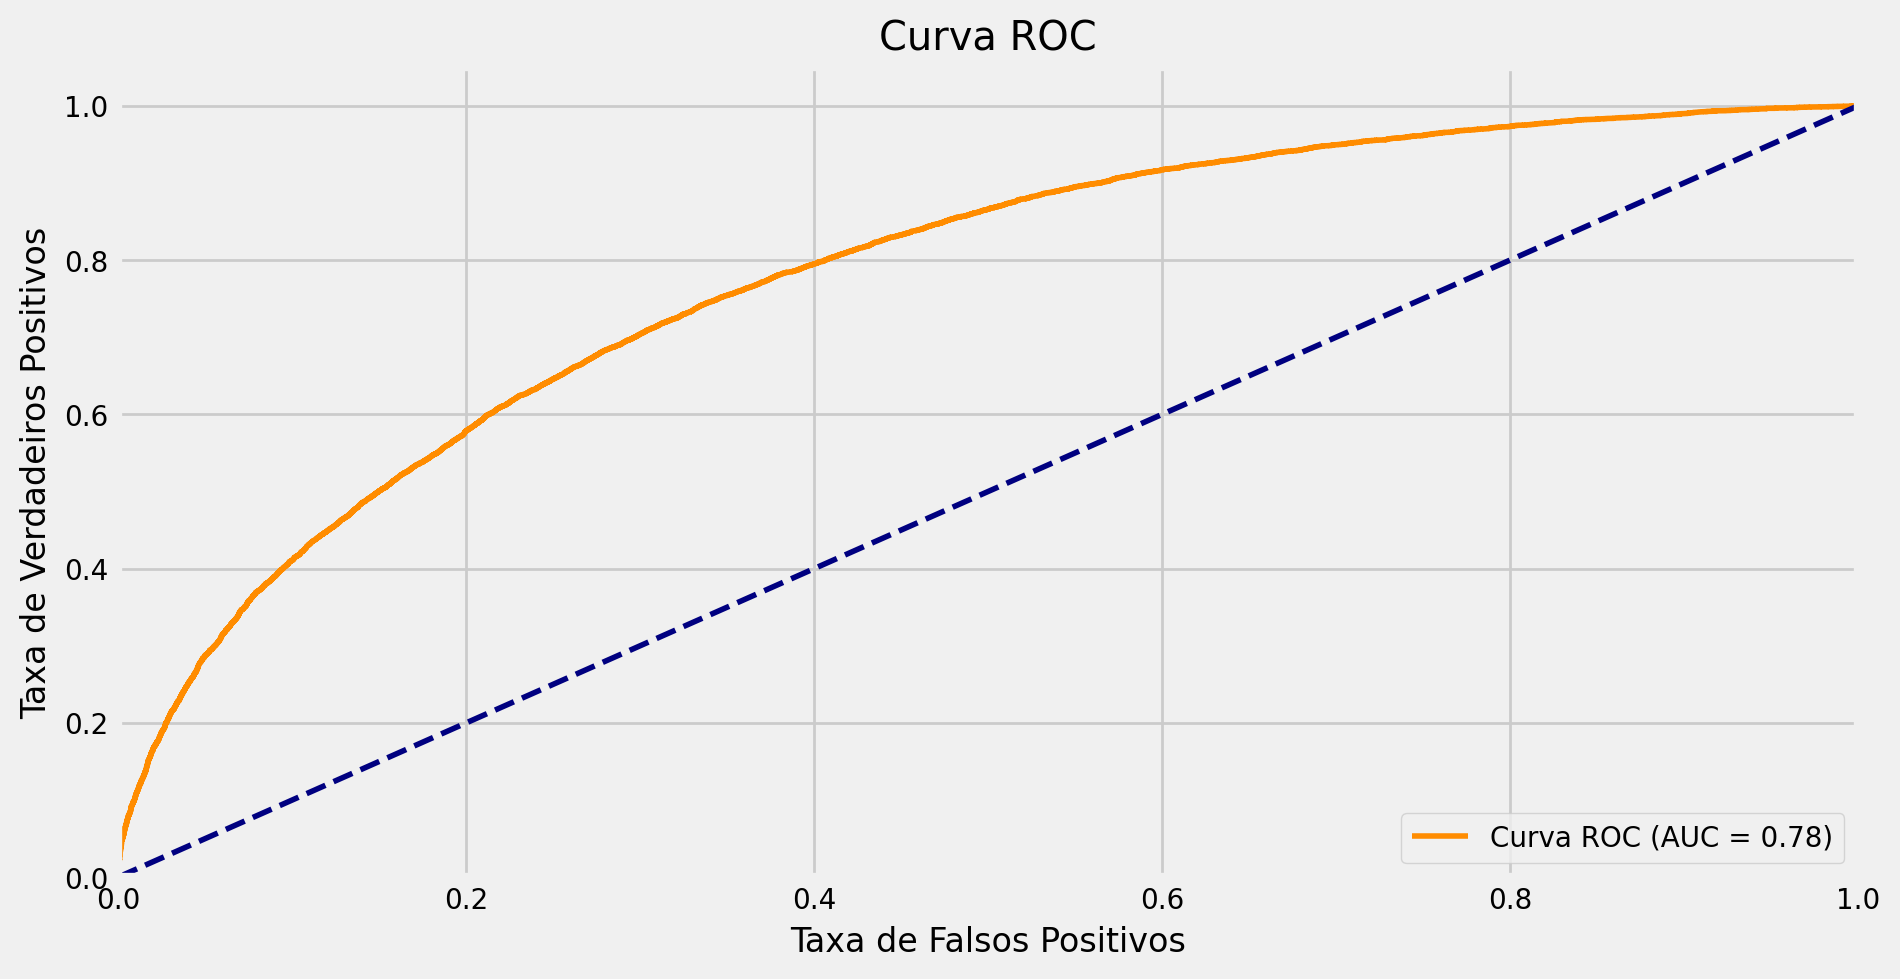

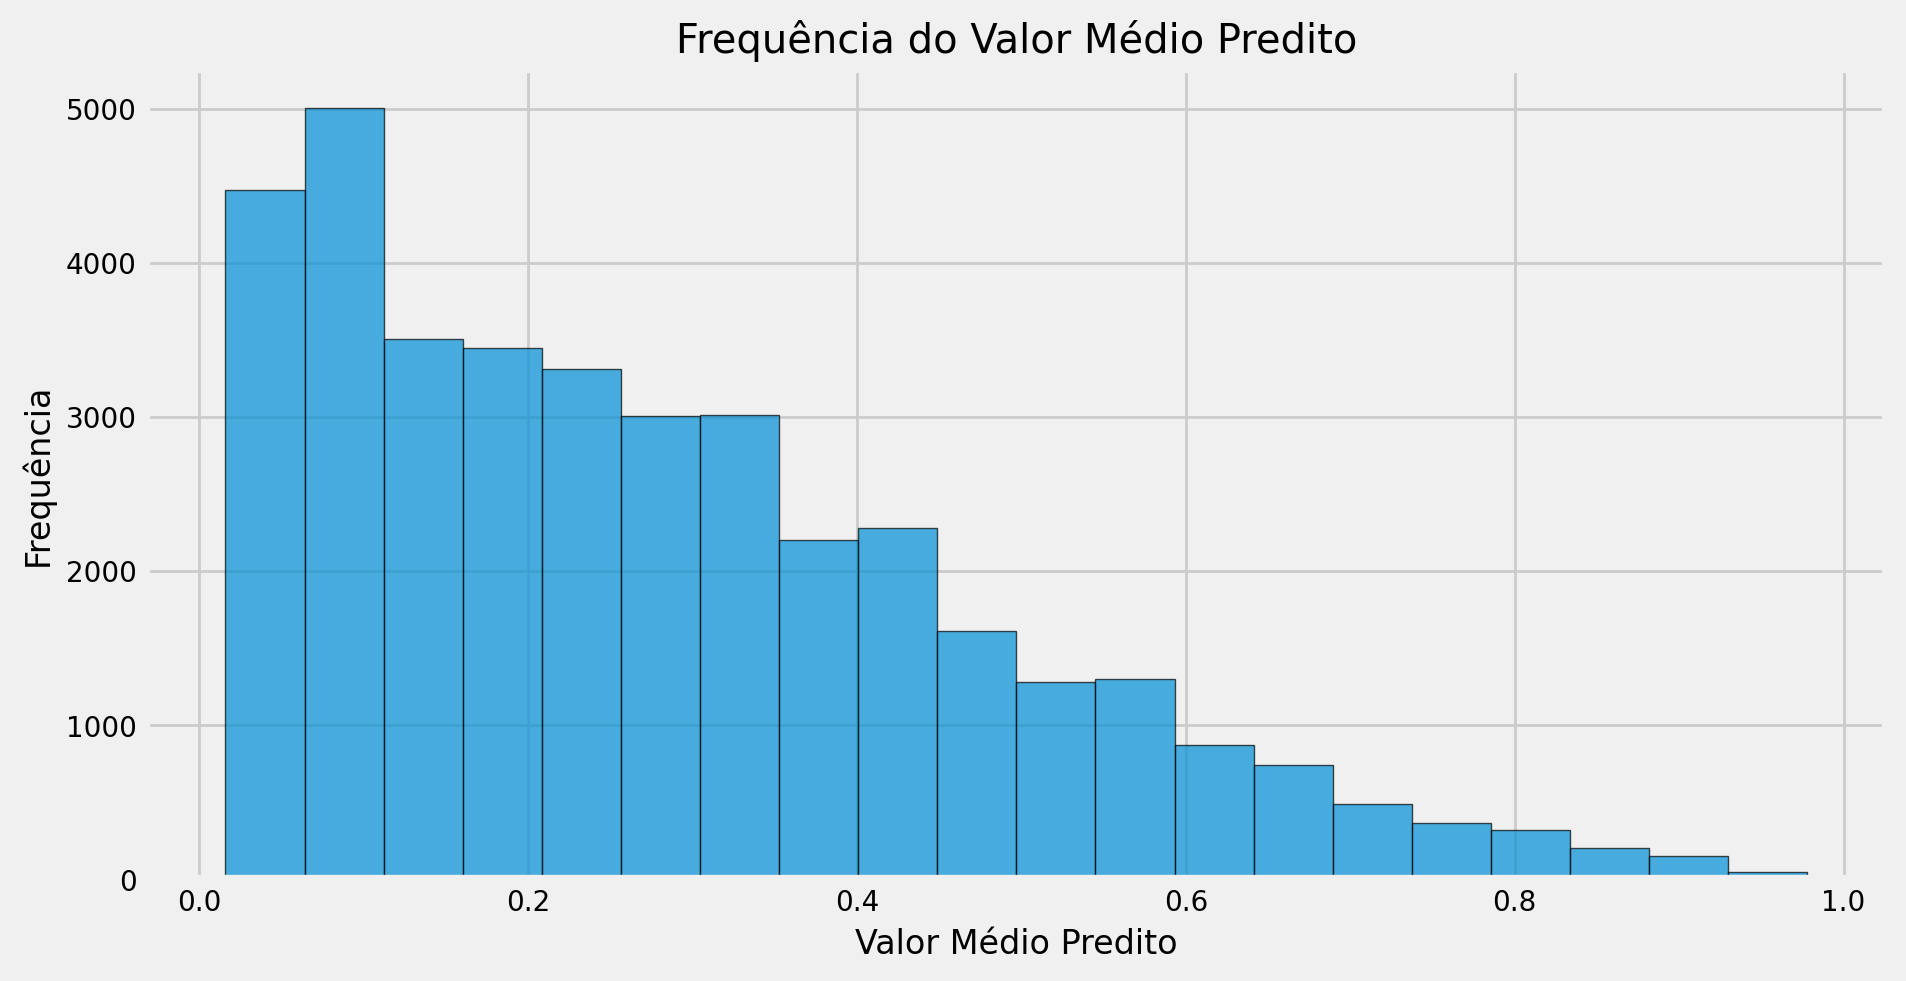

In [ ]:
# Gráfico de Calibração
plt.figure(figsize=(10, 5))

prob_true, prob_pred = calibration_curve(y_test, prob_pos_xgboost, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeita Calibração')

plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência Real')
plt.title('Gráfico de Calibração')
plt.legend()
plt.show()

# Área sob a curva ROC
fpr, tpr, _ = roc_curve(y_test, prob_pos_xgboost)
roc_auc = roc_auc_score(y_test, prob_pos_xgboost)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Frequência do Valor Médio Predito
plt.figure(figsize=(10, 5))
plt.hist(prob_pos_xgboost, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Valor Médio Predito')
plt.ylabel('Frequência')
plt.title('Frequência do Valor Médio Predito')
plt.show()


**6.3 LightGBM**

In [ ]:
lgm_model = LGBMClassifier()


In [ ]:
# LightGBM
rs_params_lgbm = {
        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)
}


In [ ]:
# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv_lgbm = RandomizedSearchCV(lgm_model, param_distributions=rs_params_lgbm, cv = 3, n_iter=50,verbose=0)

rs_cv_lgbm.fit(X_train, y_train)



A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 wi

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=50,
                   param_distributions={'bagging_fraction': (0.5, 0.8),
                                        'bagging_frequency': (5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'max_depth': (10, 13),
                                        'min_data_in_leaf': (90, 120),
                                        'num_leaves': (1200, 1550)})

In [ ]:
best_params_lgbm = rs_cv_lgbm.best_params_
best_params_lgbm

{'num_leaves': 1200,
 'min_data_in_leaf': 120,
 'max_depth': 10,
 'feature_fraction': 0.5,
 'bagging_frequency': 8,
 'bagging_fraction': 0.5}

In [ ]:
lgbm_otimizado = LGBMClassifier(**best_params_lgbm)


lgbm_otimizado.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 24659, number of negative: 63075
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

LGBMClassifier(bagging_fraction=0.5, bagging_frequency=8, feature_fraction=0.5,
               max_depth=10, min_data_in_leaf=120, num_leaves=1200)

In [ ]:
# Aplicando aos dados de teste
y_pred_lgbm = lgbm_otimizado.predict(X_test)
prob_pos_lgbm = lgbm_otimizado.predict_proba(X_test)[:,1]

print('LightGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lgbm)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_lgbm)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_lgbm)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_lgbm)))


print(classification_report(y_test, y_pred_lgbm))

# quero ver o desemepenho no treino também
# prob_pos_lgbm_treino = clf_lgbm.predict_proba(X_train)[:,1]
# print("AUC treino: {:.4f}".format(roc_auc_score(y_train, prob_pos_lgbm_treino)))


[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
LightGBM Model
Accuracy: 0.7630
Precision: 0.6375
Recall: 0.3631
AUC: 0.7716
              precision    recall  f1-score   support

           0       0.7

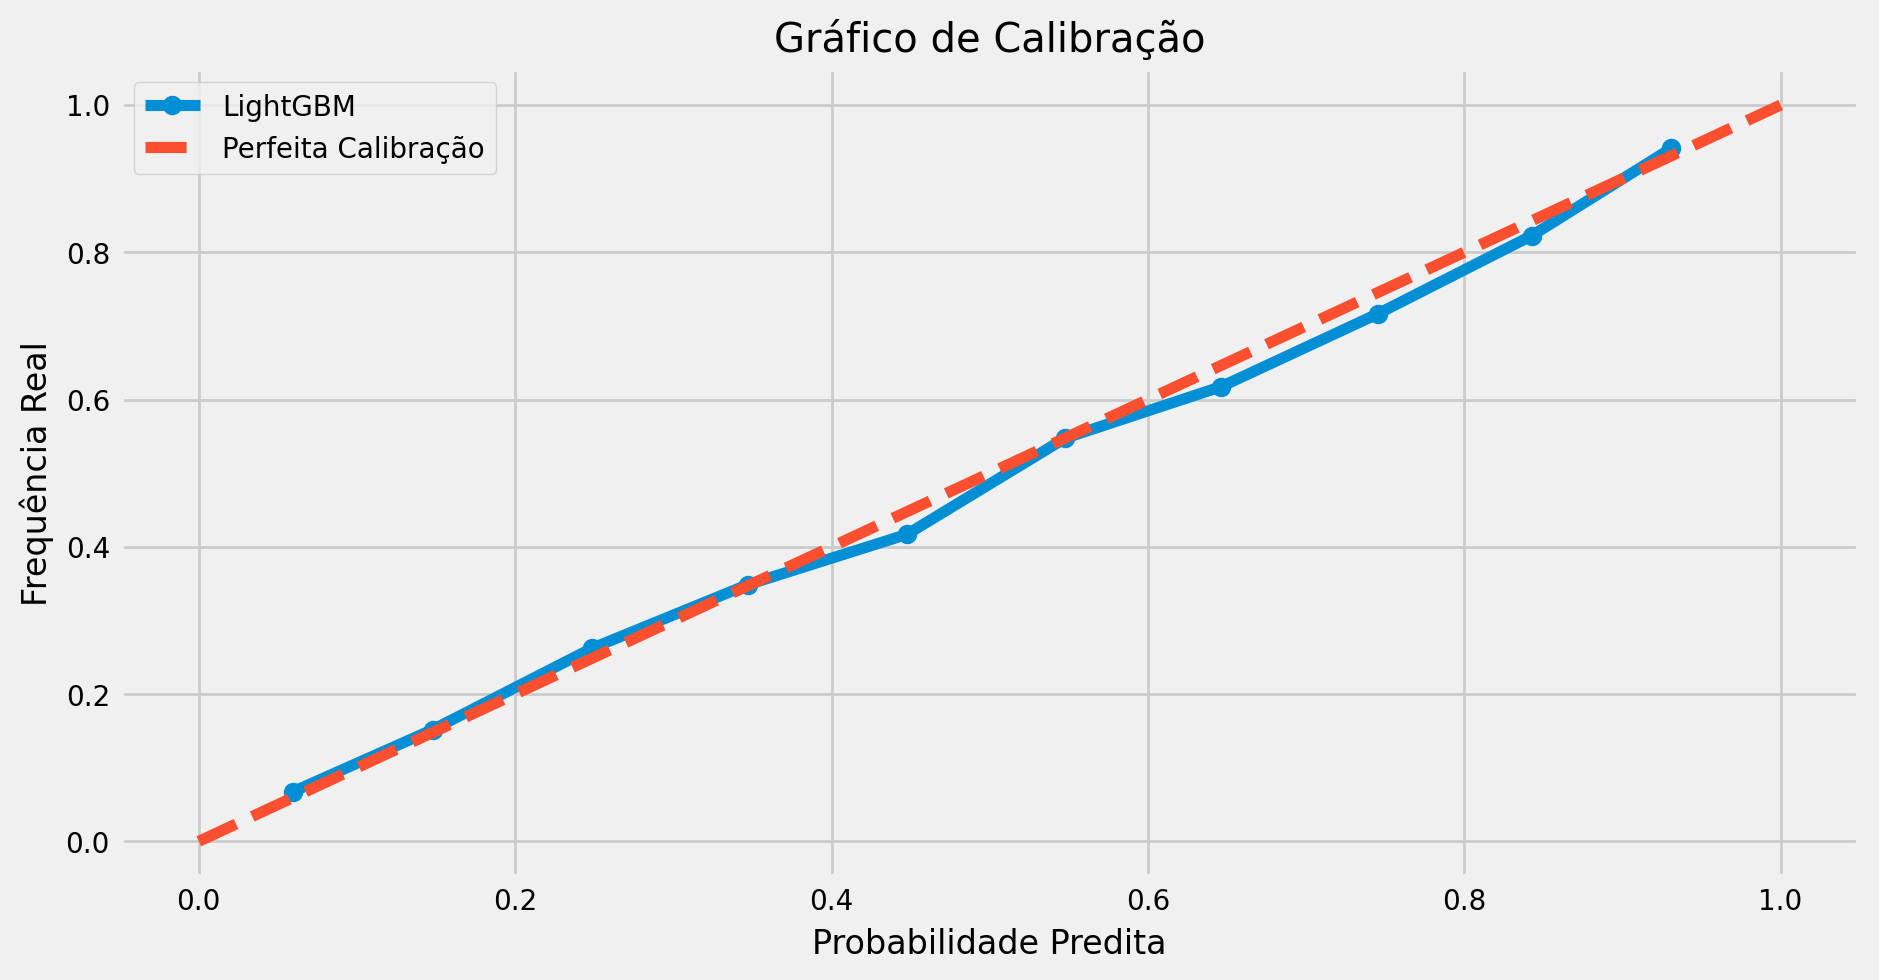

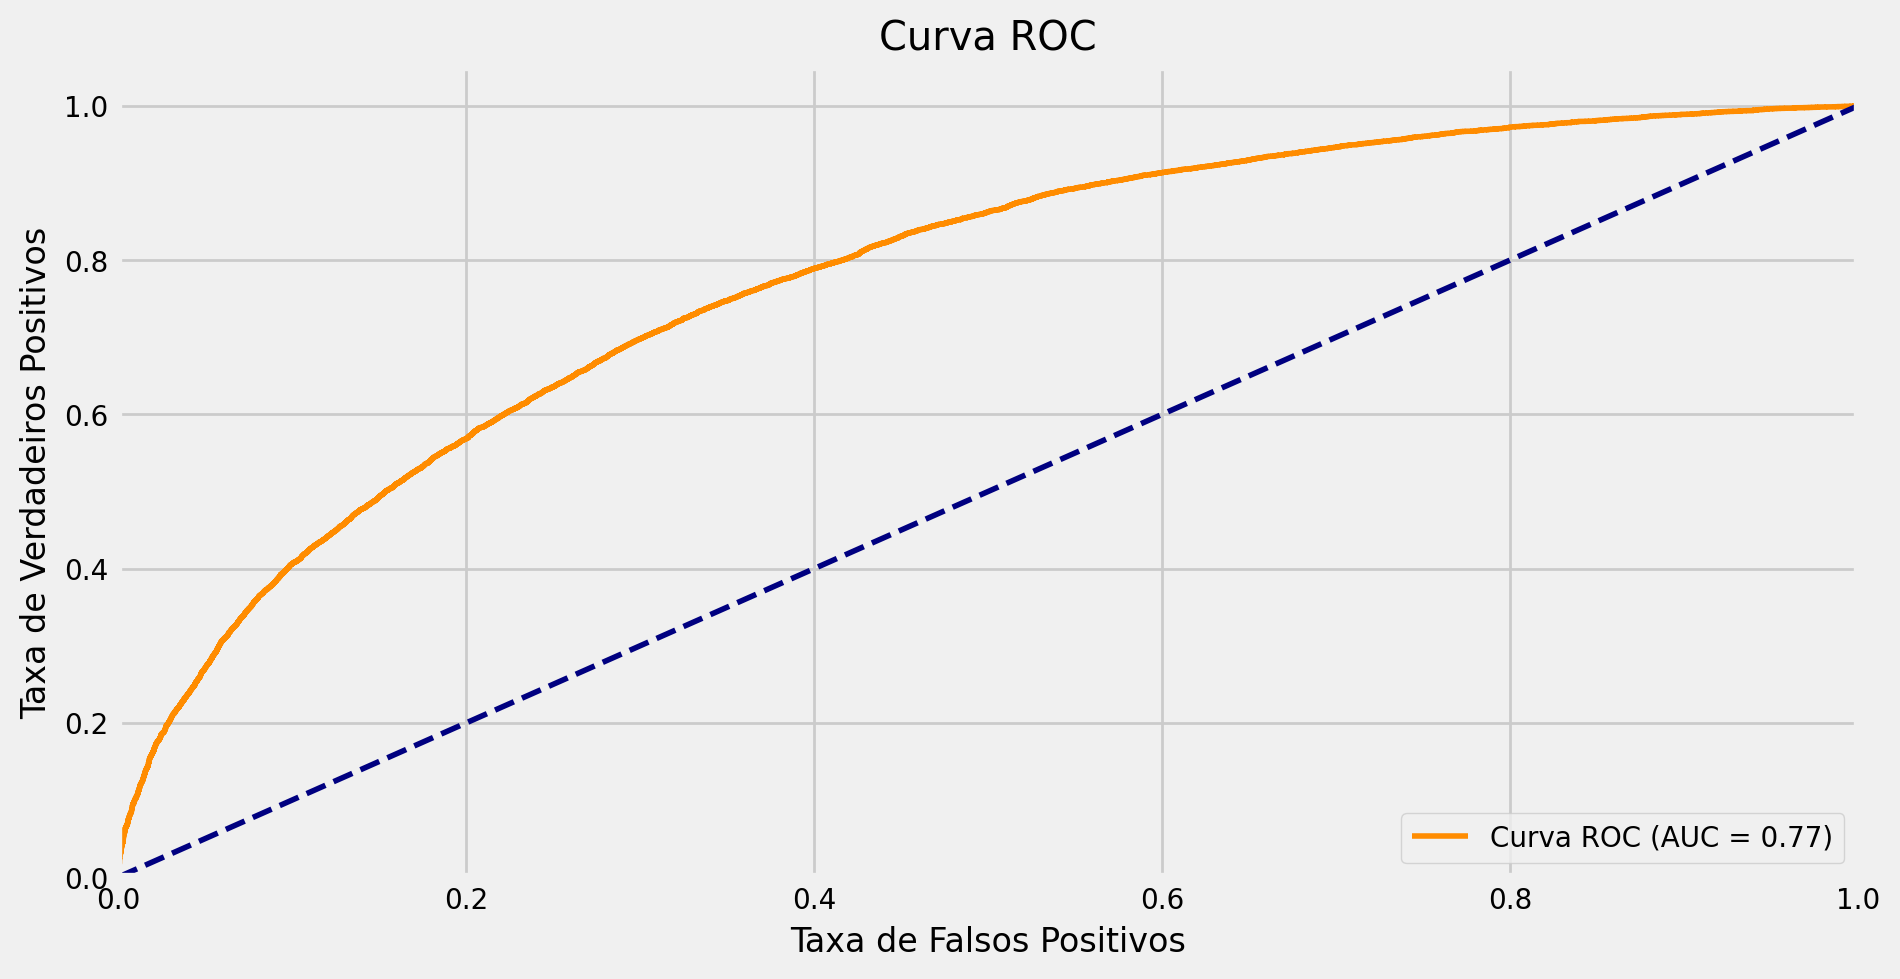

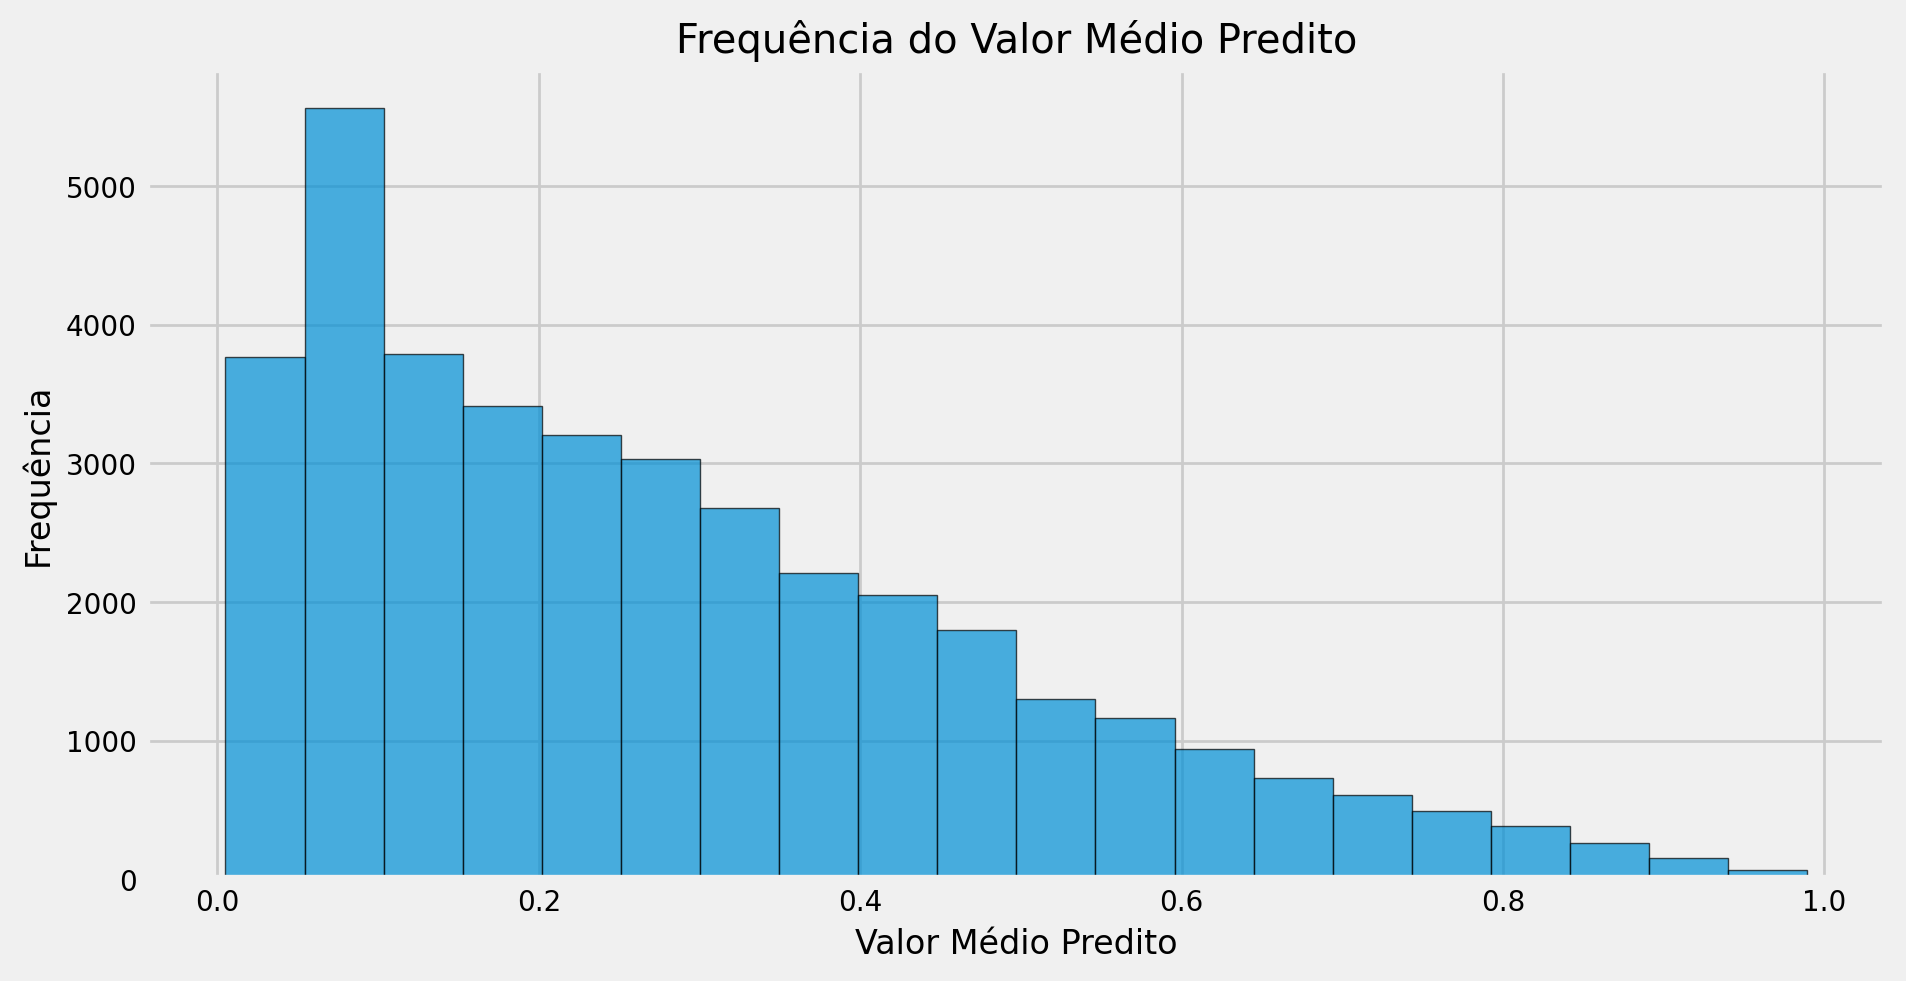

In [ ]:
# Gráfico de Calibração
plt.figure(figsize=(10, 5))

prob_true, prob_pred = calibration_curve(y_test, prob_pos_lgbm, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='LightGBM')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeita Calibração')

plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência Real')
plt.title('Gráfico de Calibração')
plt.legend()
plt.show()

# Área sob a curva ROC
fpr, tpr, _ = roc_curve(y_test, prob_pos_lgbm)
roc_auc = roc_auc_score(y_test, prob_pos_lgbm)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Frequência do Valor Médio Predito
plt.figure(figsize=(10, 5))
plt.hist(prob_pos_lgbm, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Valor Médio Predito')
plt.ylabel('Frequência')
plt.title('Frequência do Valor Médio Predito')
plt.show()


**6.4 Catboost**

In [ ]:
# Catboost
# definimos o range dos hiperparâmetros a serem testados
grid = {"depth": [3, 1, 2, 6, 4, 5, 7, 8, 9, 10],
                "iterations": [250, 100, 500, 1000],
                "learning_rate": [0.03, 0.001, 0.01, 0.1, 0.2, 0.3],
                "l2_leaf_reg": [3, 1, 5, 10, 100],
                "border_count": [32, 5, 10, 20, 50, 100, 200]
               }
catboost_rs = CatBoostClassifier(eval_metric='Logloss', silent = True, random_seed=42,use_best_model= False) # realizamos a "chamada" do algoritmo, sem aplicar diretamente aos nossos dados

rs_cv_catboost = RandomizedSearchCV(catboost_rs, n_iter=20, cv=3, verbose=1, param_distributions=grid, random_state=42,n_jobs = -1) # realizamos a chamada do randomsearchCV, indicando que utilizaremos o algoritmo definido como 'catboost_rs'


In [ ]:
rs_cv_catboost.fit(X_train, y_train) # aplicamos o random search com base nas definições do bloco de código anterior. No fit, especificamos que estamos aplicando ao conjunto de treinamento.

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7c0fd5d7d550>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'border_count': [32, 5, 10, 20, 50, 100,
                                                         200],
                                        'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9,
                                                  10],
                                        'iterations': [250, 100, 500, 1000],
                                        'l2_leaf_reg': [3, 1, 5, 10, 100],
                                        'learning_rate': [0.03, 0.001, 0.01,
                                                          0.1, 0.2, 0.3]},
                   random_state=42, verbose=1)

In [ ]:
best_params_catboost = rs_cv_catboost.best_params_
best_params_catboost

{'learning_rate': 0.01,
 'l2_leaf_reg': 10,
 'iterations': 1000,
 'depth': 4,
 'border_count': 50}

In [ ]:
catboost_otimizado = CatBoostClassifier(eval_metric='Logloss', silent = True, random_seed=42,
                                       **best_params_catboost)
catboost_otimizado.fit(X_train, y_train)

In [ ]:
y_pred_catboost =catboost_otimizado.predict(X_test)
prob_pos_catboost = catboost_otimizado.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Catboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost)))

print(classification_report(y_test, y_pred_catboost))

Catboost Model
Accuracy: 0.7651
Precision: 0.6515
Recall: 0.3534
AUC: 0.7767
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     27033
           1       0.65      0.35      0.46     10568

    accuracy                           0.77     37601
   macro avg       0.72      0.64      0.65     37601
weighted avg       0.75      0.77      0.74     37601



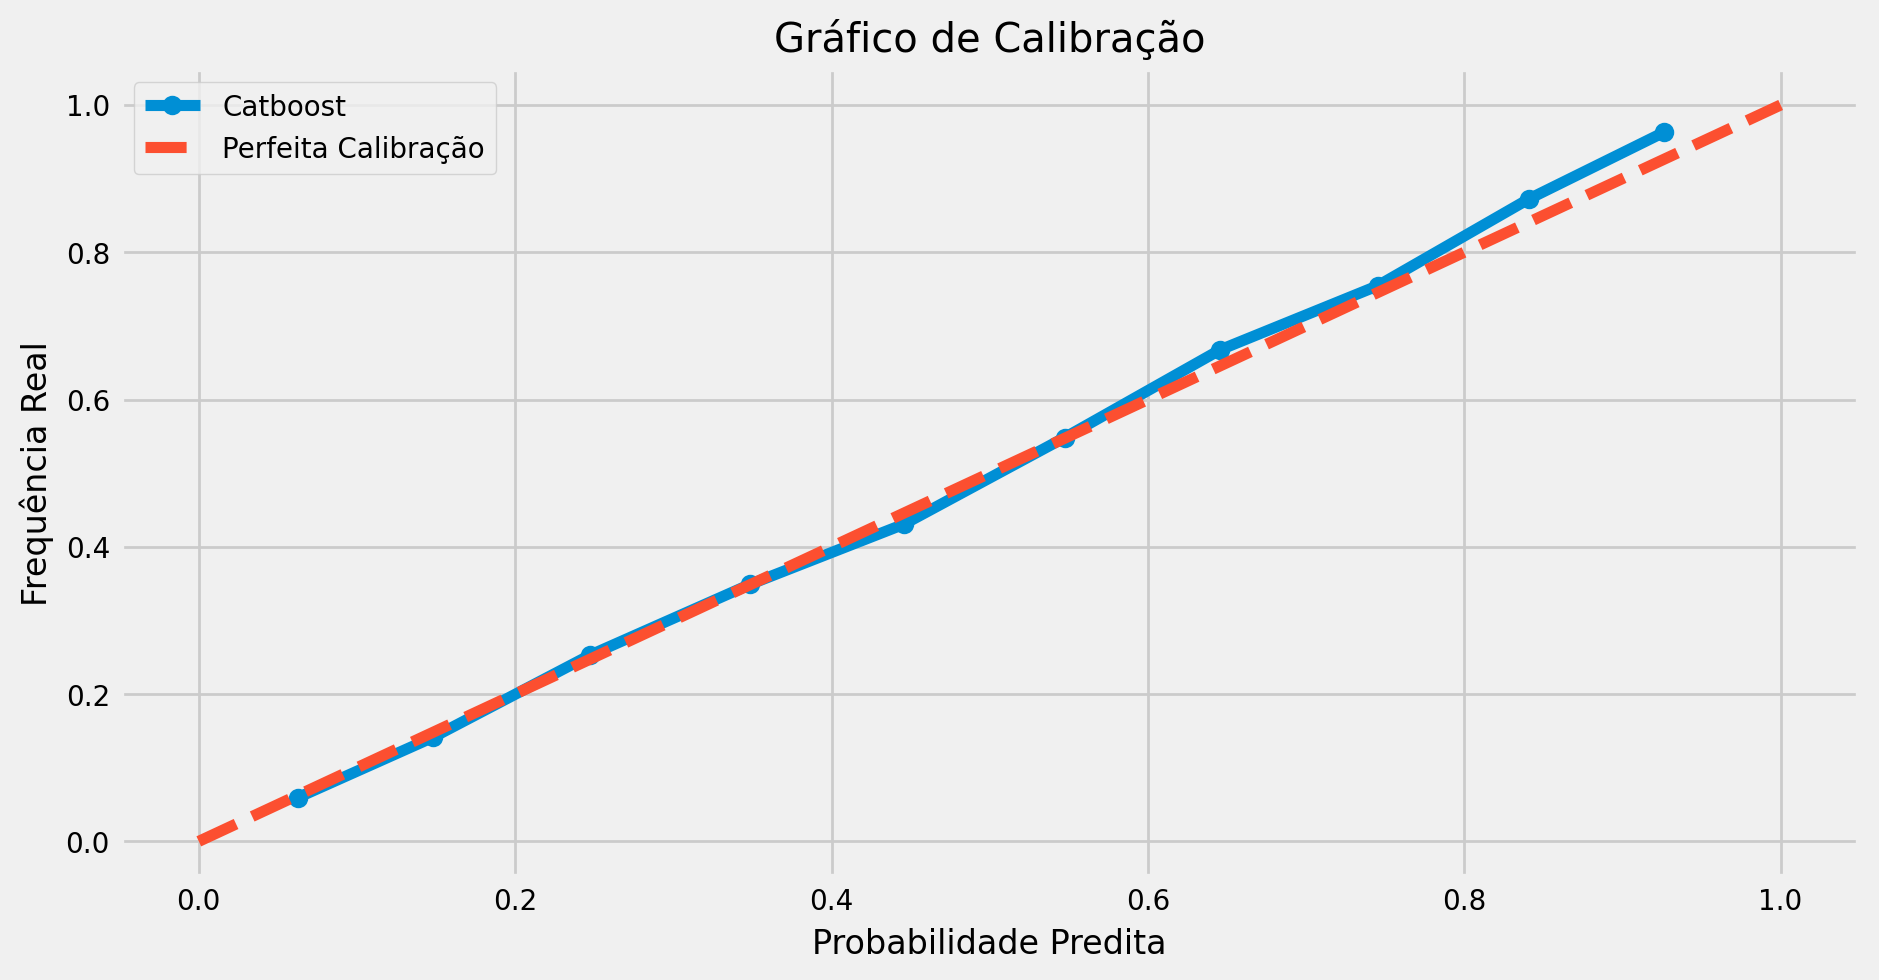

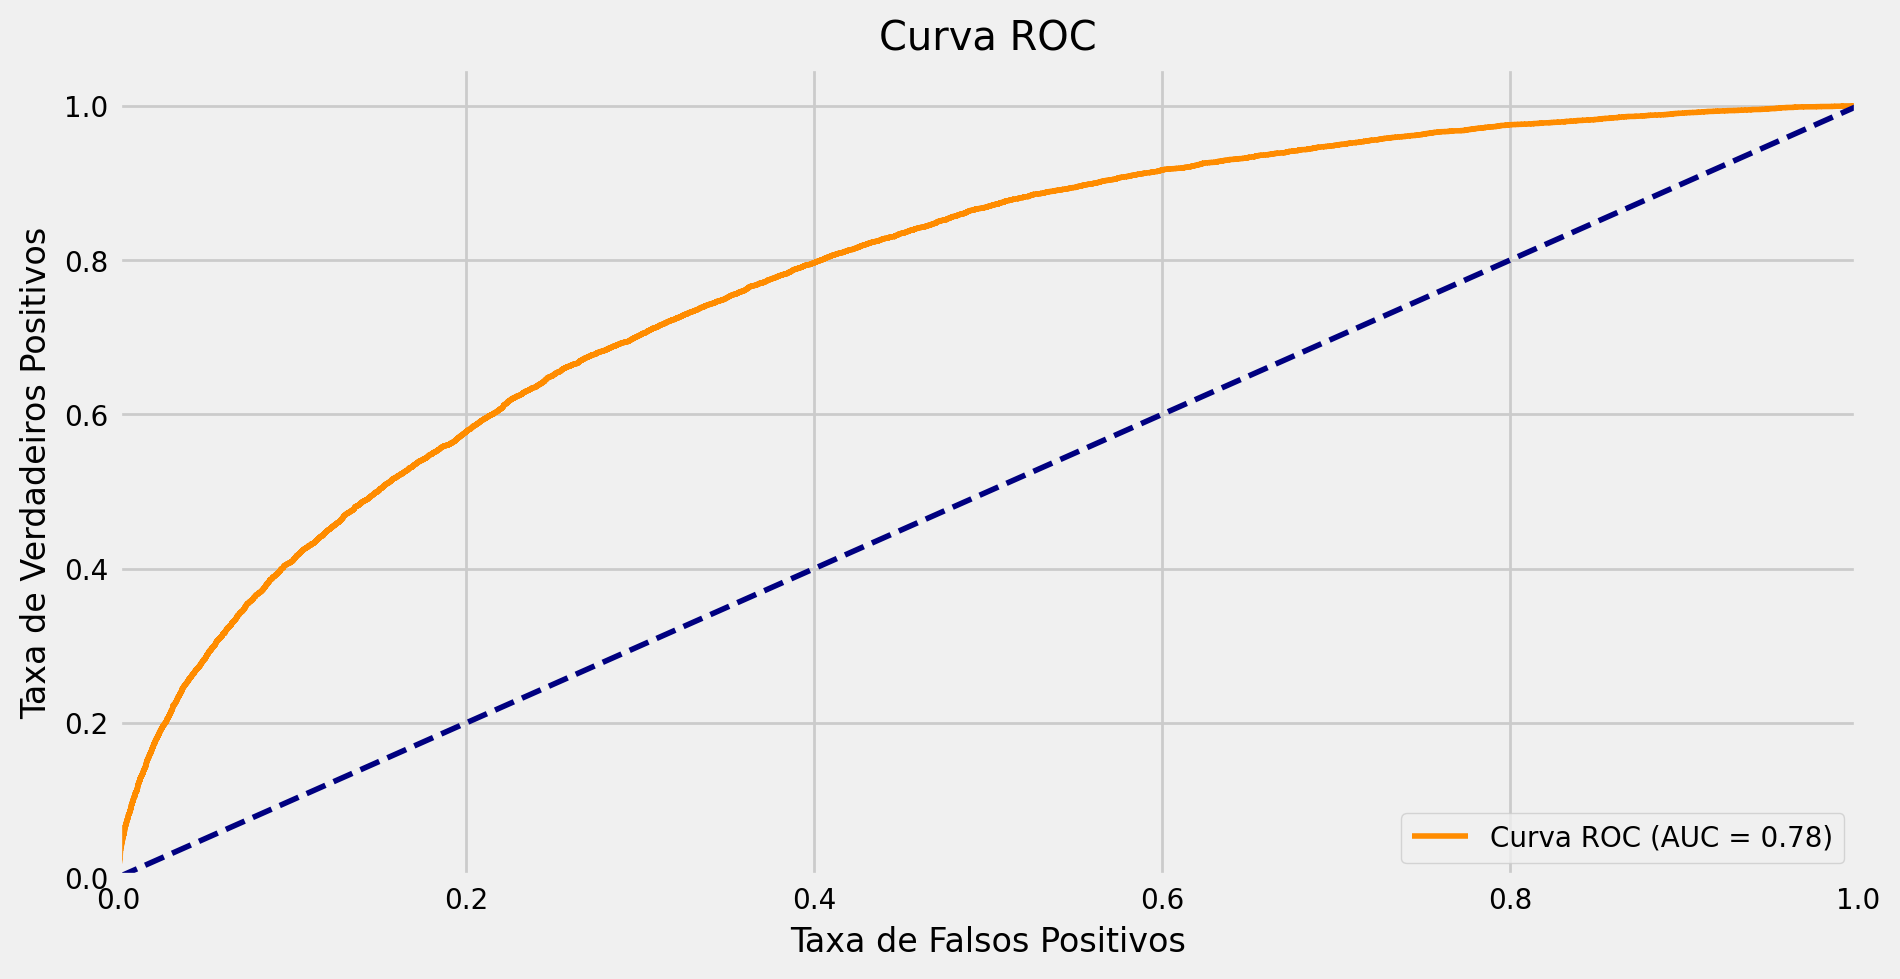

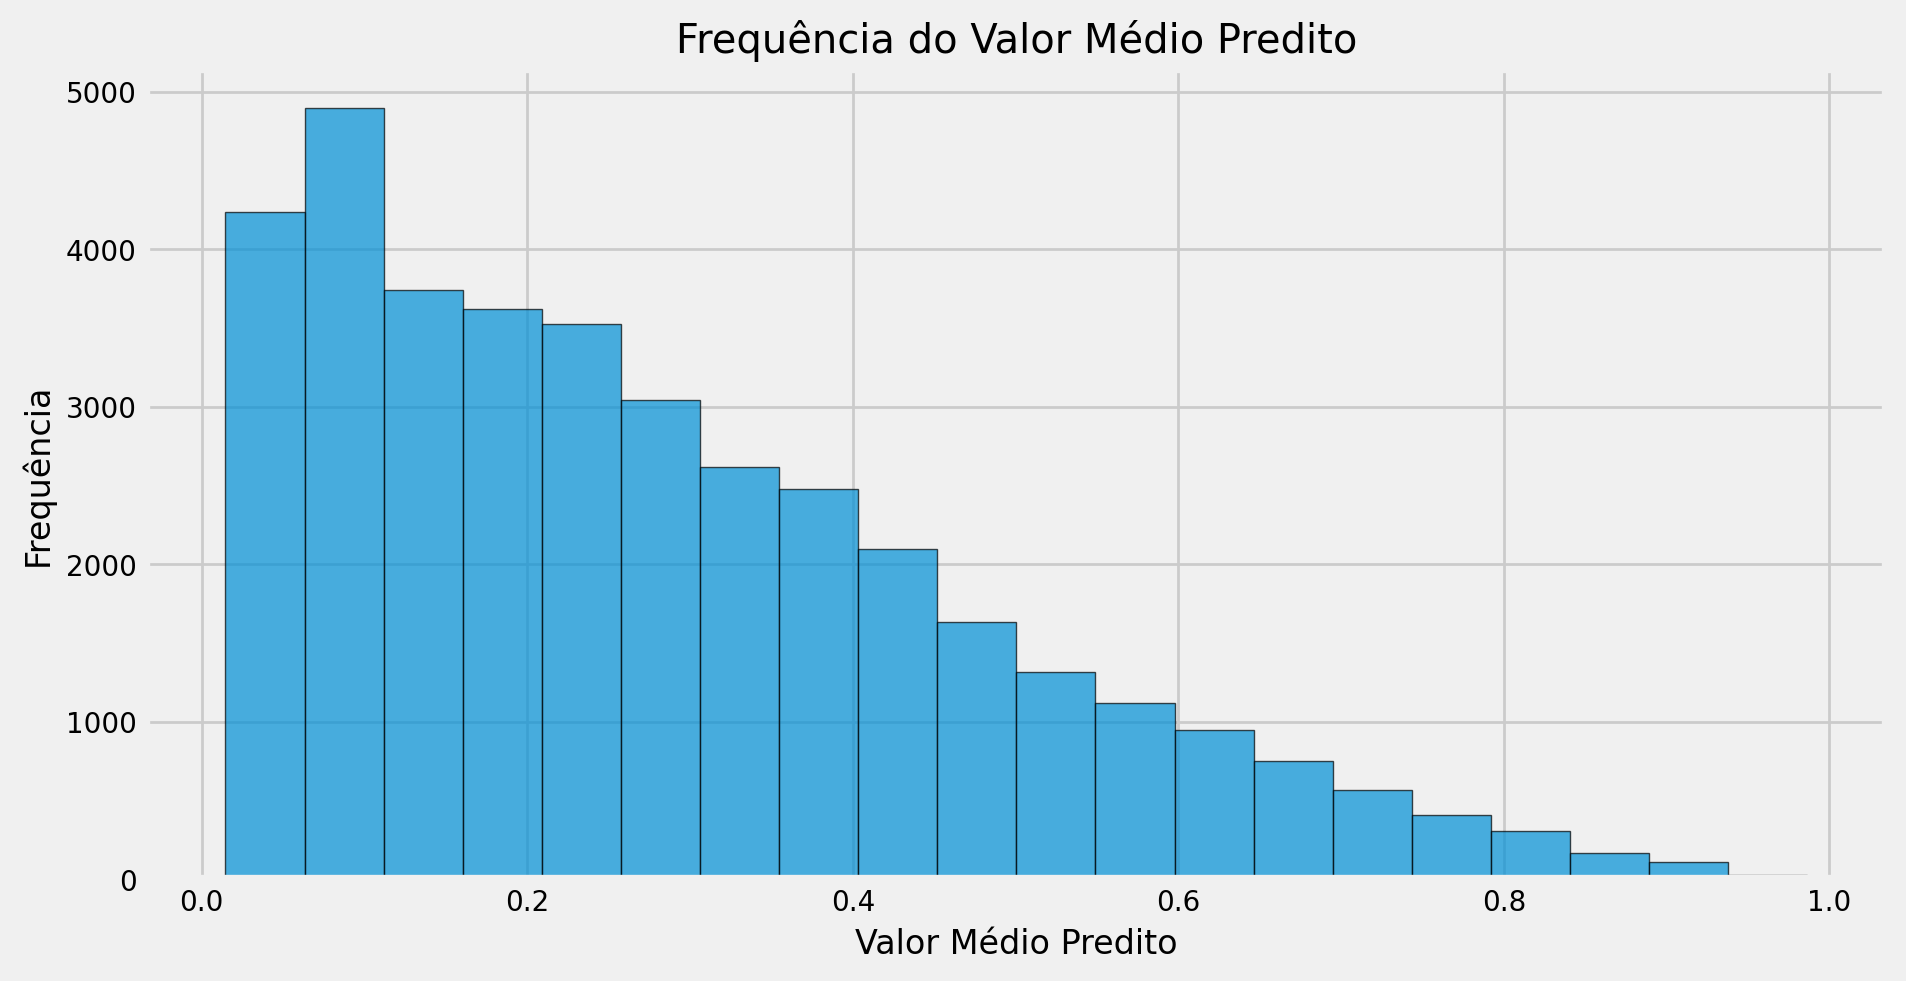

In [ ]:
# Gráfico de Calibração
plt.figure(figsize=(10, 5))

prob_true, prob_pred = calibration_curve(y_test, prob_pos_catboost, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Catboost')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeita Calibração')

plt.xlabel('Probabilidade Predita')
plt.ylabel('Frequência Real')
plt.title('Gráfico de Calibração')
plt.legend()
plt.show()

# Área sob a curva ROC
fpr, tpr, _ = roc_curve(y_test, prob_pos_catboost)
roc_auc = roc_auc_score(y_test, prob_pos_catboost)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Gráfico de Frequência do Valor Médio Predito
plt.figure(figsize=(10, 5))
plt.hist(prob_pos_catboost, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Valor Médio Predito')
plt.ylabel('Frequência')
plt.title('Frequência do Valor Médio Predito')
plt.show()


In [ ]:
# Comparando os resultados dos algoritmos

In [ ]:
# criando uma tabela com as métricas
col_names = ["Modelo", "Accuracy", "Precision", "Recall", "AUC(ROC)"] # definindo o cabeçalho

# definindo os valores
data = [["Random Forest", accuracy_score(y_test, y_pred_rf),precision_score(y_test, y_pred_rf),recall_score(y_test, y_pred_rf),roc_auc_score(y_test, prob_pos_rf)],
        ["XGBoost", accuracy_score(y_test, y_pred_xgboost),precision_score(y_test, y_pred_xgboost),recall_score(y_test, y_pred_xgboost),roc_auc_score(y_test, prob_pos_xgboost)],
        ["LightGBM", accuracy_score(y_test, y_pred_lgbm),precision_score(y_test, y_pred_lgbm),recall_score(y_test, y_pred_lgbm),roc_auc_score(y_test, prob_pos_lgbm)],
        ["Catboost", accuracy_score(y_test, y_pred_catboost),precision_score(y_test, y_pred_catboost),recall_score(y_test, y_pred_catboost),roc_auc_score(y_test, prob_pos_catboost)]]


In [ ]:
pd.set_option('display.float_format', lambda x: '%2f' % x) # tabela com três casas decimais

print('Resultados para conjunto de teste.')
df_results = pd.DataFrame(data, columns = col_names) # transformando os resultados do teste em um data.frame

# função para destacarmos os maiores valores em cada uma das métricas
def highlight_max(s):
    if s.dtype == object:  # Uso do tipo `object` diretamente
        is_max = [False for _ in range(s.shape[0])]  # Declarando que quando o tipo de dado for objeto, não aplicaremos o highlight
    else:
        is_max = s == s.max()
    return ['background: yellow' if cell else '' for cell in is_max]

# Aplicar a função de destaque ao DataFrame
df_results_styled = df_results.style.apply(highlight_max)
df_results_styled


Resultados para conjunto de teste.


,Modelo,Accuracy,Precision,Recall,AUC(ROC)
0,Random Forest,0.763597,0.663359,0.322578,0.772750
1,XGBoost,0.765272,0.653724,0.350492,0.775991
2,LightGBM,0.762958,0.637481,0.363077,0.771554
3,Catboost,0.765139,0.651491,0.353425,0.776693


**8. Seleção de variáveis com BORUTA**


In [ ]:
!pip install boruta

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Configurando o RandomForest como modelo de base
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Configurando o Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)

# Aplicando o Boruta
boruta_selector.fit(X_train.values,y_train)

# Imprimindo os resultados
selected_features = X_train.columns[boruta_selector.support_].to_list()
tentative_features = X_train.columns[boruta_selector.support_weak_].to_list()
remove_features = list(set(X_train.columns) - set(selected_features) - set(tentative_features))



In [ ]:
print("Selected Features:", selected_features)
print("Tentative Features:", tentative_features)
print("To remove Features:", remove_features)
print("All Features:", X_train.columns.to_list())


Selected Features: ['numAge', 'bmi', 'tchol', 'sbp', 'htn', 'smoking', 't2d', 'gender', 'race_Asian/PI', 'race_Black/AfAm', 'race_White']
Tentative Features: []
To remove Features: ['race_AmInd']
All Features: ['numAge', 'bmi', 'tchol', 'sbp', 'htn', 'smoking', 't2d', 'gender', 'race_AmInd', 'race_Asian/PI', 'race_Black/AfAm', 'race_White']


In [ ]:
# Modelo com Boruta - Selecionado as variáveis preditoras
X_train_boruta = X_train[['numAge', 'bmi', 'tchol', 'sbp', 'htn', 'smoking', 't2d', 'gender', 'race_Asian/PI', 'race_Black/AfAm', 'race_White']]

X_test_boruta = X_test[['numAge', 'bmi', 'tchol', 'sbp', 'htn', 'smoking', 't2d', 'gender', 'race_Asian/PI', 'race_Black/AfAm', 'race_White']]

print('Shape sem boruta', X_train.shape, X_test.shape)
print('Shape com boruta', X_train_boruta.shape, X_test_boruta.shape)


# verificamos que o boruta removeu somente uma variável preditora

Shape sem boruta (87734, 12) (37601, 12)
Shape com boruta (87734, 11) (37601, 11)


**9. Catboost com BORUTA**

Utilizamos o Catboost, pois foi o algoritmo com melhor desempenho entre os quatro testados

In [ ]:
catboost_otimizado_boruta = CatBoostClassifier(eval_metric='Logloss', silent = True, random_seed=42,
                                        **best_params_catboost)
catboost_otimizado_boruta.fit(X_train_boruta, y_train)

In [ ]:
# catboost

y_pred_catboost_boruta = catboost_otimizado_boruta.predict(X_test_boruta)
prob_pos_catboost_boruta = catboost_otimizado_boruta.predict_proba(X_test_boruta)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost_boruta)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost_boruta)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost_boruta)))

print(classification_report(y_test, y_pred_catboost))

XGBoost Model
Accuracy: 0.7645
Precision: 0.6495
Recall: 0.3523
AUC: 0.7766
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     27033
           1       0.65      0.35      0.46     10568

    accuracy                           0.77     37601
   macro avg       0.72      0.64      0.65     37601
weighted avg       0.75      0.77      0.74     37601



**Comparando os resultados do teste c/ e s/ BORUTA para o catboost**

In [ ]:
print("###### CATBOOST SEM BORUTA #####")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost)))

print(classification_report(y_test, y_pred_catboost))

print("\n", "###### CATBOOST COM BORUTA #####")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost_boruta)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost_boruta)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost_boruta)))

print(classification_report(y_test, y_pred_catboost))

###### CATBOOST SEM BORUTA #####
Accuracy: 0.7651
Precision: 0.6515
Recall: 0.3534
AUC: 0.7767
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     27033
           1       0.65      0.35      0.46     10568

    accuracy                           0.77     37601
   macro avg       0.72      0.64      0.65     37601
weighted avg       0.75      0.77      0.74     37601


 ###### CATBOOST COM BORUTA #####
Accuracy: 0.7645
Precision: 0.6495
Recall: 0.3523
AUC: 0.7766
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     27033
           1       0.65      0.35      0.46     10568

    accuracy                           0.77     37601
   macro avg       0.72      0.64      0.65     37601
weighted avg       0.75      0.77      0.74     37601



**Obtendo as predições e os riscos para os pacientes do teste**

In [ ]:
X_test # verificando o conjuto X de teste

,numAge,bmi,tchol,sbp,htn,smoking,t2d,gender,race_AmInd,race_Asian/PI,race_Black/AfAm,race_White
0,-0.765511,1.387139,-1.091504,-0.891419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,-0.336487,-0.206144,-0.348660,-1.397151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,1.915894,1.614750,0.124058,-0.986243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,-0.658255,0.021468,-0.990207,-0.701769,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,1.701382,0.249080,-0.449957,0.688994,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
37596,-0.336487,2.297585,-0.956441,1.163118,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
37597,-1.194536,2.980421,0.090292,-0.638553,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
37598,2.130407,-1.116590,0.866901,1.257942,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
37599,-0.336487,0.249080,-0.078536,1.795282,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
desfecho = pd.DataFrame({'desfecho':y_test}) # verificando o conjunto y de teste
desfecho.head()

,desfecho
0,0
1,1
2,0
3,1
4,1


In [ ]:
desfecho_predito = pd.DataFrame({'desfecho_predito':y_pred_catboost_boruta})
desfecho_predito.head()

,desfecho_predito
0,0
1,0
2,0
3,0
4,1


In [ ]:
prob_predita = pd.DataFrame({'prob_predita':prob_pos_catboost_boruta})
prob_predita.head()

,prob_predita
0,0.065377
1,0.055125
2,0.176893
3,0.218112
4,0.647067


In [ ]:
pd.concat([X_test, desfecho, desfecho_predito, prob_predita], axis=1) # juntado o X_test, o desfecho, a predição e a probabilidade predita

,numAge,bmi,tchol,sbp,htn,smoking,t2d,gender,race_AmInd,race_Asian/PI,race_Black/AfAm,race_White,desfecho,desfecho_predito,prob_predita
0,-0.765511,1.387139,-1.091504,-0.891419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0,0,0.065377
1,-0.336487,-0.206144,-0.348660,-1.397151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1,0,0.055125
2,1.915894,1.614750,0.124058,-0.986243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0,0,0.176893
3,-0.658255,0.021468,-0.990207,-0.701769,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1,0,0.218112
4,1.701382,0.249080,-0.449957,0.688994,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1,1,0.647067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37596,-0.336487,2.297585,-0.956441,1.163118,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1,1,0.547952
37597,-1.194536,2.980421,0.090292,-0.638553,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1,0,0.225212
37598,2.130407,-1.116590,0.866901,1.257942,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0,1,0.533869
37599,-0.336487,0.249080,-0.078536,1.795282,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1,0,0.464216


**10. Valores de Shapley**

In [ ]:
import shap

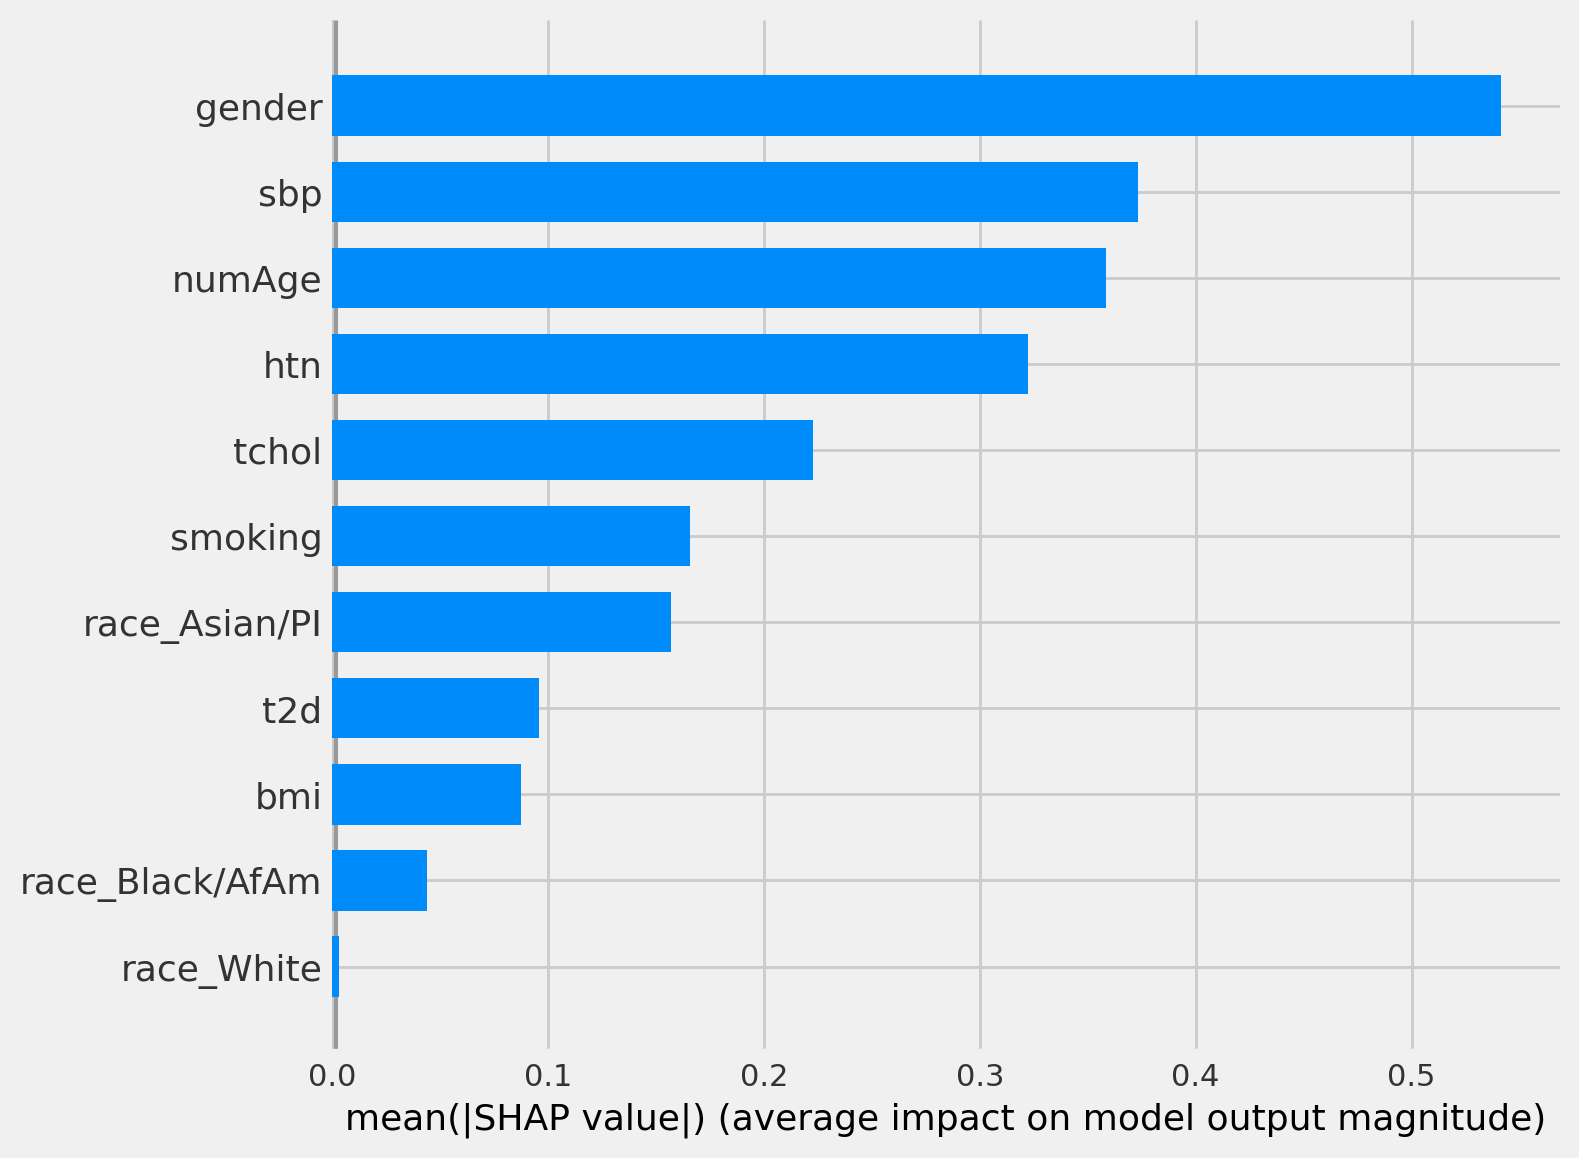

In [ ]:
# resultados no teste
shap_values_test = shap.TreeExplainer(catboost_otimizado_boruta).shap_values(X_test_boruta)
shap.summary_plot(shap_values_test, X_test_boruta, plot_type="bar")

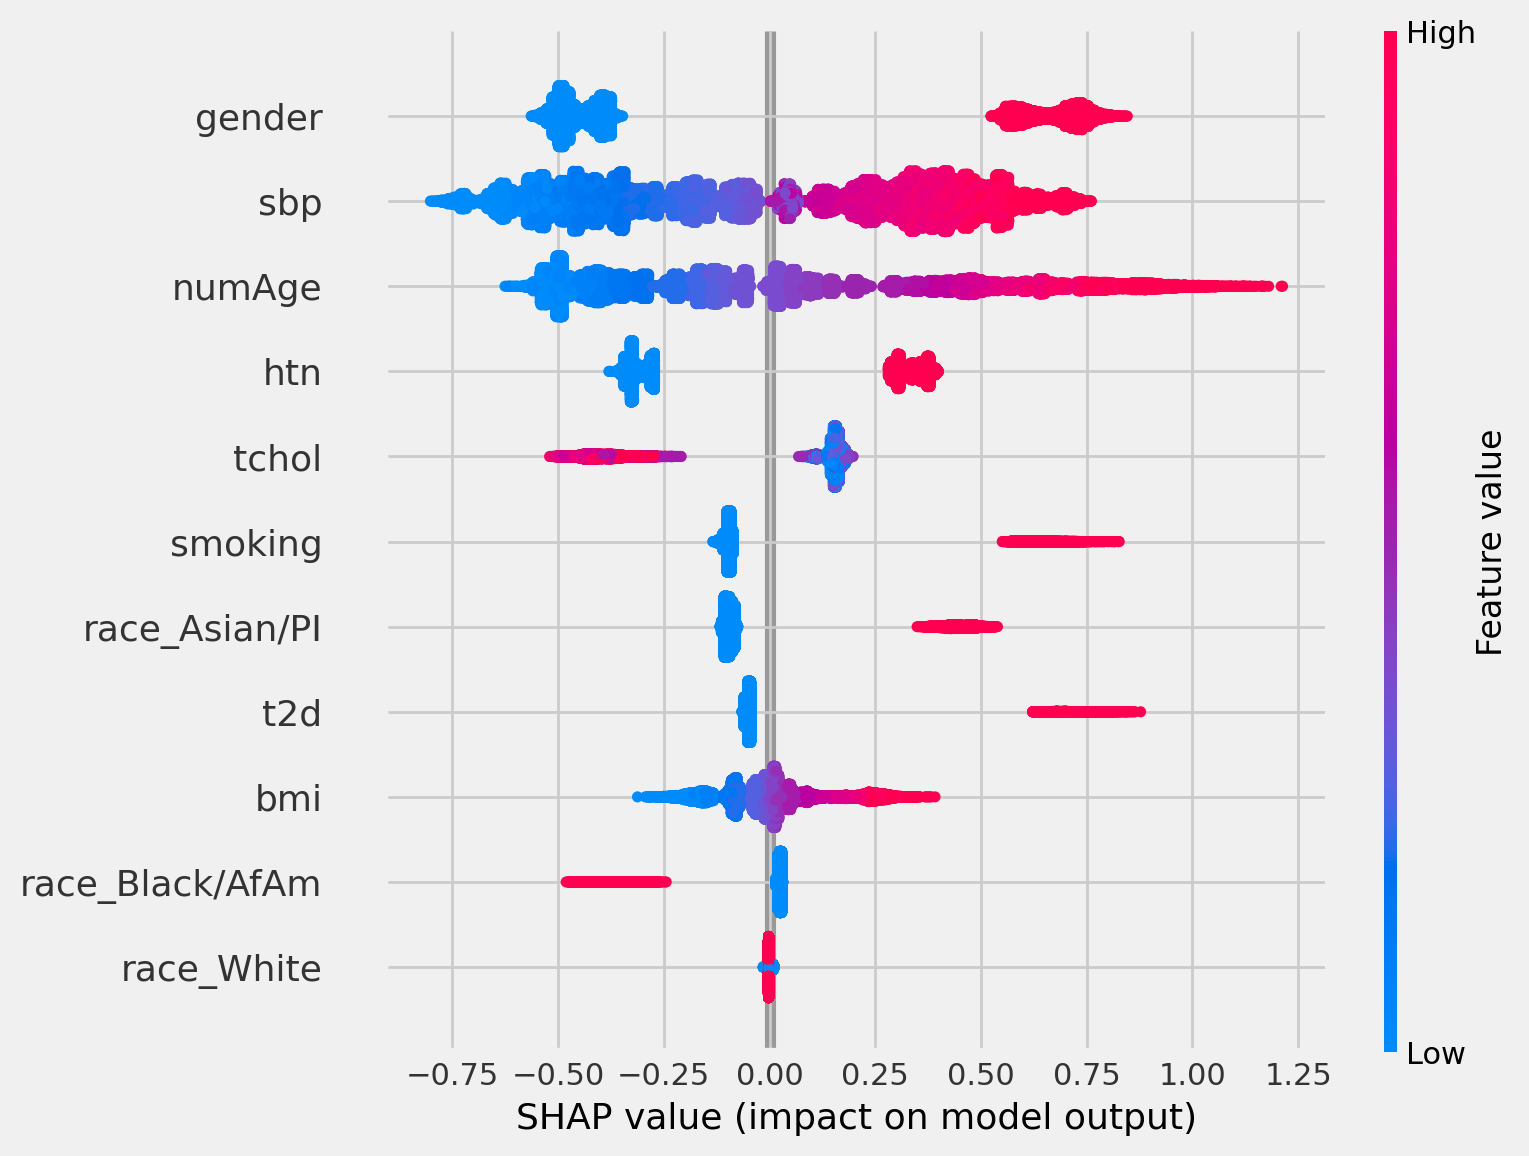

In [ ]:
shap.summary_plot(shap_values_test, X_test_boruta)

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(catboost_otimizado_boruta)
shap_values = explainer.shap_values(X_test_boruta)

i = 0
# Inserindo os dados do paciente
print('Desfecho do paciente:', y_test[i])
print('Predição:', y_pred_catboost_boruta[i])

# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test_boruta.iloc[i,:])

Desfecho do paciente: 0
Predição: 0


**11. Salvando e carregando o modelo**

Finalizamos a análise e salvaremos o algoritmo para alguma aplicação futura

In [ ]:
import joblib
import os

In [ ]:
def save_model(model, path):
    """Função para salvar o modelo localmente.
    Args:
        model: Modelo para salvar
        path (str): caminho para salvar o modelo
    """
    if os.path.dirname(path):
        os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "wb") as f:
        joblib.dump(model, f)

In [ ]:
# salvando o modelo catboost otimizado com seleção de variáveis feita pelo boruta
save_model(catboost_otimizado_boruta, 'models/catboost_otimizado_boruta.pkl')

**Carregando um modelo desenvolvido previamente**

In [ ]:
def read_model(path):
    """Função para ler um modelo salvo
    Args:
        path (str): caminho do modelo salvo
    Returns:
        file: modelo carregado
    """
    with open(path, "rb") as f:
        file = joblib.load(f)

    return file

In [ ]:
# alterar caminho e nome do modelo conforme necessidades
modelo_carregado = read_model('models/catboost_otimizado_boruta.pkl')

In [ ]:
# obtendo os hiperparâmetros do modelo
modelo_carregado.get_params()

{'iterations': 1000,
 'learning_rate': 0.01,
 'depth': 4,
 'l2_leaf_reg': 10,
 'border_count': 50,
 'random_seed': 42,
 'silent': True,
 'eval_metric': 'Logloss'}

In [ ]:
# revalidando os resultados de teste
# em uma aplicação real, após as etapas de pré-processamento nos dados novos,
# faríamos as predições nos novos indivíduos após o carregamento de um modelo pré-treinado
resultado = modelo_carregado.score(X_test_boruta, y_test) # padrão da função é a acurácia. Aqui utilizamos somente para demonstrar e comparar os valores como exemplo
resultado

0.7645275391611925